### **Challenge Objective**

For the Maven Coffee Challenge, you'll play the role of an Analytics Consultant hired by a group of investors looking to break into the US coffee market. They would like to leverage insights from "The Great American Coffee Taste Test", but lack the analytical skills to do so. That's where you come in!

You've been asked to share an explanatory report providing a data-driven strategy for opening their first coffee shop. The investors expressed interest in the following areas, but are open to any additional insights and recommendations you can provide:

**Target audience:** What type of customer should we target, and what are their preferences?

**Product offering:** What types of coffee beans and drinks should we offer?

**Pricing strategy:** How can we align prices with customer value perception?

### **Approach to the Challenge**

I tackled this challenge dividing the workflow in two distinct parts:
data exploration and deep analysis in Fabric, to create the full report, and creation of a simplified and visually appealing version of the report using Power BI.

I began by importing the data into a “Landing” Lakehouse, where I conducted initial explorations to identify target groups for the new coffee shop.

I transformed the survey data using Dataflow Gen-2 and loaded it into a “Final-Model” Lakehouse. After this point the data was in a format that is suitable for easy and deep data analysis. More details on data transformations in its dedicated section.

In a Spark Notebook, I crafted a comprehensive report, complete with visualizations of the survey data using PySpark and explanatory text.

In the Notebook I first made a tabulation work to aggregate the survey results, into summary tables, for each question and target group, using Spark SQL. After these tables were created, I converted them into pySpark data frames and I visualised them leveraging Python libraries.
I finally used the Markdowns to comment the results and to provide recommendations.

Link to the Notebook with all the SQL and Python codes for the visualizations contained in the full report -> here

The second part of the challenge involved summarizing the key insights and recommendations, in a visually appealing manner.

To achieve this, I utilized Power BI to create a simplified version of the report.

By following this approach, I ensured that stakeholders received both a detailed analysis and a concise summary of the findings and the advised actions to take.

### **Data Transformation**

Following the definition of the target audiences, a data transformation was performed. The objective was to convert the raw survey data into a format that facilitated analysis and insight extraction.

### **Full Report: Data Driven Strategy for breaking into US Coffee Shops Market**

### Target Audience Definition

**Stakeholders question: "what type of customer should we target?"**

Given that market research was conducted and data from ‘The Great American Coffee Taste Test’ survey was leveraged, it is crucial to interpret the results in light of the goals it aimed to achieve.

The ultimate goal is the successful establishment of a coffee shop. For this to be achieved, offerings and pricing must be tailored to the preferences of potential customers.

But, who are these potential customers?

Before proceeding, it’s needed to take a step back to fully comprehend the nature of this business.

**What is a coffee shop?** _“A coffeehouse, coffee shop, or café is an establishment that primarily serves various types of coffee, espresso, latte, and cappuccino. Some coffeehouses may serve cold drinks, such as iced coffee and iced tea, as well as other non-caffeinated beverages. A coffeehouse may also serve food, such as light snacks, sandwiches, muffins, fruit, or pastries.”_ - Source: [Wikipedia](https://en.wikipedia.org/wiki/Coffeehouse#:~:text=A%20coffeehouse%2C%20coffee%20shop%2C%20or,as%20other%20non%2Dcaffeinated%20beverages)

Given this definition, potential customers can be all the people that have interest in a coffee shop offering. Therefore, leveraging the information available in the survey, two potential target groups can be defined as:

**Daily Out-of-Home Coffee Drinkers:** individuals who typically drink at least one coffee per day, and that claim to drink coffees at a cafe or at the office or on the go, among the places where they typically drink coffees.

**Why this group?** This group forms a solid customer base because they have no problem getting a coffee outside of their home and can be easily targeted: those that drink coffees in a cafe are natural customers, those that drink it on the go can be targeted by establishing an on-the-go section in the cafe, and those at the office can be targeted with online delivery services to bring coffees and snacks to workplaces surrounding the coffee shop, or people can just step in during work breaks. These are all potential customers of a newly opened coffee shop.

**Daily Cafe Coffee Drinkers:** individuals who typically drink at least one coffee per day and, and that claim to drink coffees at a cafe, among the places where they typically drink coffees.

**Why this group?** This group is the natural target group of the coffee shop business as these individuals always include cafes among the places where they typically get a coffee.

**An important consideration:** it is crucial to create target groups that, on one hand, align with the ‘ideal customer’ persona, but on the other hand, are large enough to justify the investment. Therefore, it is necessary to determine whether these groups of people (Daily Out-of-Home Coffee Drinkers and Daily Cafe Coffee Drinkers) have a sufficiently large population to justify the new coffee shop's strategies being tailored to target them.

In [4]:
USE Maven_Coffee_Challenge_Landing;

WITH DOoHCD AS (
SELECT  
count(distinct facts_questionnaire_results_landing.`Submission_ID`) as DailyOoHCoffeeDrinkers
FROM
facts_questionnaire_results_landing
WHERE
facts_questionnaire_results_landing.`How_many_cups_of_coffee_do_you_typically_drink_per_day?` in (1, 2, 3, 4, "More than 4") and
facts_questionnaire_results_landing.`Where_do_you_typically_drink_coffee?__At_the_office_` = true OR
facts_questionnaire_results_landing.`Where_do_you_typically_drink_coffee?__On_the_go_` = true OR
facts_questionnaire_results_landing.`Where_do_you_typically_drink_coffee?__At_a_cafe_` = true
),

DCCD AS (
SELECT  
count(distinct facts_questionnaire_results_landing.`Submission_ID`) as DailyCafeCoffeeDrinkers
FROM
facts_questionnaire_results_landing
WHERE
facts_questionnaire_results_landing.`How_many_cups_of_coffee_do_you_typically_drink_per_day?` in (1, 2, 3, 4, "More than 4") and
facts_questionnaire_results_landing.`Where_do_you_typically_drink_coffee?__At_a_cafe_` = true
),

TotalInterviewed AS (
SELECT 
count(DISTINCT facts_questionnaire_results_landing.`Submission_ID`) AS GeneralPopulation
FROM
facts_questionnaire_results_landing
)

SELECT 
    FORMAT_NUMBER(GeneralPopulation, 0) AS General_Population, 
    FORMAT_NUMBER(DailyOoHCoffeeDrinkers, 0) AS Daily_Out_of_Home_Coffee_Drinkers, 
    CONCAT(FORMAT_NUMBER(DailyOoHCoffeeDrinkers/GeneralPopulation * 100, 2), '%') AS Incidence, 
    FORMAT_NUMBER(DailyCafeCoffeeDrinkers, 0) AS Daily_Cafe_Coffee_Drinkers, 
    CONCAT(FORMAT_NUMBER(DailyCafeCoffeeDrinkers/GeneralPopulation * 100, 2), '%') AS Incidence
FROM 
    TotalInterviewed, DOoHCD, DCCD



StatementMeta(, , -1, Finished, Available)

<Spark SQL result set with 0 rows and 0 fields>

<Spark SQL result set with 1 rows and 5 fields>

The analysis indicates that ‘Daily Out-of-Home Coffee Drinkers’ make up approximately 56% of the surveyed population, while ‘Daily Cafe Coffee Drinkers’ represent around 25%.

These proportions validate the chosen target groups. 

However, these results underscore the importance of considering a broad demographic as overly narrow focus could inadvertently exclude a significant portion of potential customers. For this reason, no other restrictions for defining target customers are made. 

**The next analysis will focus on determining optimal offering and pricing for the new coffee shop to:**

- **ensure satisfaction of the ‘Daily Cafe Coffee Drinkers’:** this group forms the core customer base, and their satisfaction is critical to success.

- **attract the wider ‘Daily Out-of-Home Coffee Drinkers’:** engaging this larger customer segment could significantly expand the customer base.

### Target Audience Preferences

**Stakeholders questions: "what are the their (Target Audiences) preferences?" - "What types of coffee beans and drinks should we offer?**

At first, it has been investigate **why** the Daily Out-of-Home Coffee Drinkers and the Daily Cafe Coffee Drinkers **drink coffee**.

Then it has been proceeded to understand **what coffee drinks** they prefer and **how** they drink their coffees.

Finally, a deep dive on the type of coffee beans has been conducted to have clear **what coffee beans** the Coffee Drinkers wish to have for their coffee drinks.

In [3]:
USE Maven_Coffee_Challenge_Model;

-- Why do you drink coffee? Multi-Choice

SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Why_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 42 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Why_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 42 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC

StatementMeta(, , -1, Finished, Available)

<Spark SQL result set with 0 rows and 0 fields>

<Spark SQL result set with 5 rows and 4 fields>

<Spark SQL result set with 5 rows and 4 fields>

In [18]:
%%pyspark
df_corrected3 = spark.sql("""
select
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Why_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 42 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
""")

df_corrected3b = spark.sql("""
select
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Why_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 42 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
""")

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 20, Finished, Available)

In [19]:
%%pyspark
!pip install matplotlib pandas

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 21, Finished, Available)

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 81, Finished, Available)

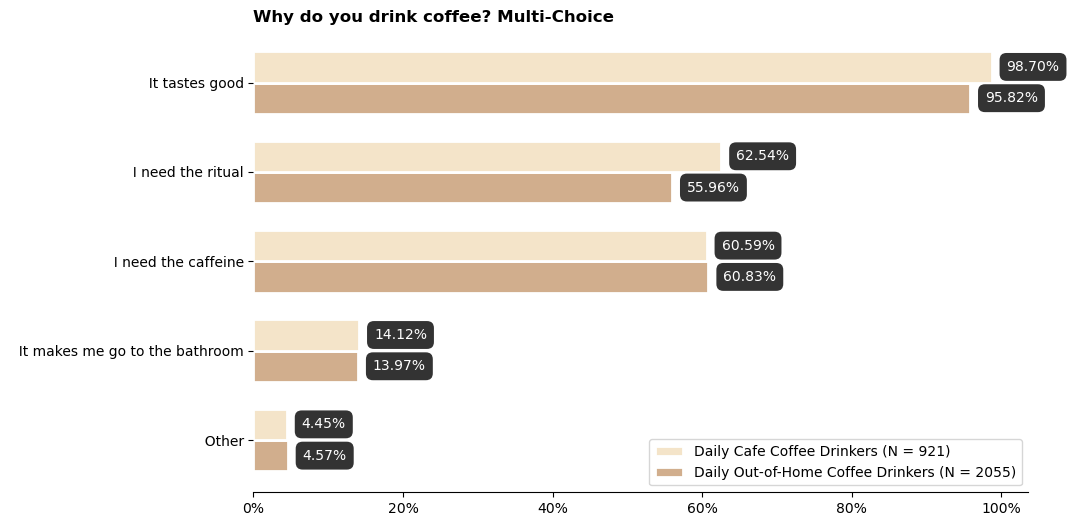

In [73]:
%%pyspark
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Convert Spark DataFrame to Pandas DataFrame
df_corrected3_pd = df_corrected3.toPandas()
df_corrected3b_pd = df_corrected3b.toPandas()

# Sort the 'Daily_Cafe_Coffee_Drinkers' dataframe based on 'Perc_Why_Coffee' in descending order
df_corrected3b_pd = df_corrected3b_pd.sort_values('Perc_Why_Coffee', ascending=True)

# Reindex the 'Daily_OOH_Coffee_Drinkers' dataframe based on the 'Daily_Cafe_Coffee_Drinkers' dataframe to ensure the same order of categories
df_corrected3_pd.set_index('Daily_OOH_Coffee_Drinkers', inplace=True)
df_corrected3_pd = df_corrected3_pd.reindex(index=df_corrected3b_pd['Daily_Cafe_Coffee_Drinkers'])
df_corrected3_pd.reset_index(inplace=True)

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create an index for each category
index = np.arange(len(df_corrected3_pd.index))

# Define bar width
bar_width = 0.35

# Create clustered bar chart
p1 = plt.barh(index, df_corrected3_pd['Perc_Why_Coffee'], bar_width, color='#D1AE8D', edgecolor='white', linewidth=2)
p2 = plt.barh(index + bar_width, df_corrected3b_pd['Perc_Why_Coffee'], bar_width, color='#F4E4C9', edgecolor='white', linewidth=2)

# Add data labels
for i in range(len(p1)):
    plt.text(p1[i].get_width() + 0.02, p1[i].get_y() + p1[i].get_height()/2, f'{p1[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))
    plt.text(p2[i].get_width() + 0.02, p2[i].get_y() + p2[i].get_height()/2, f'{p2[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))

# Add title
plt.title('Why do you drink coffee? Multi-Choice', loc='left', fontweight='bold')

# Set y-axis labels
plt.yticks(index + bar_width / 2, df_corrected3b_pd['Daily_Cafe_Coffee_Drinkers'])

# Set legend
plt.legend([p2, p1], ['Daily Cafe Coffee Drinkers (N = ' + str(df_corrected3b_pd['question_base'].values[0]) + ')', 'Daily Out-of-Home Coffee Drinkers (N = ' + str(df_corrected3_pd['question_base'].values[0]) + ')'], loc='lower right')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Format x-axis as percentage
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Display the plot
plt.show()


**WHY THEY DRINK COFFEE:** Taste, ritual and need of caffeine are the main reasons for coffee consumption among both target groups. Particularly, taste plays a crucial role as almost the entirety of the surveyed people points this out as reason for drinking coffee.  

The first important insight here for opening a coffee shop in the US market would be to set as primary goal to offer coffee drinks that Coffee Drinkers perceive having a good taste, both in terms of good coffee itself (type of coffee grains that are offered for the drinks in the menu) and in terms of coffee drinks (variety of drinks offered in the menu). 

In [4]:
USE Maven_Coffee_Challenge_Model;

-- What is your favourite coffee drink? Single-Choice

SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Fav_Coffee,
sum(sum(Answer)  / count(DISTINCT Submission_ID)) OVER (ORDER BY sum(Answer)  / 
count(DISTINCT Submission_ID) DESC) as Cumulative_Perc,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 8 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Fav_Coffee,
sum(sum(Answer)  / count(DISTINCT Submission_ID)) OVER (ORDER BY sum(Answer)  / 
count(DISTINCT Submission_ID) DESC) as Cumulative_Perc,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 8 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC

StatementMeta(, , , Waiting, )

<Spark SQL result set with 0 rows and 0 fields>

<Spark SQL result set with 12 rows and 5 fields>

<Spark SQL result set with 12 rows and 5 fields>

In [2]:
%%pyspark
df_corrected4 = spark.sql("""
SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Fav_Coffee,
sum(sum(Answer)  / count(DISTINCT Submission_ID)) OVER (ORDER BY sum(Answer)  / 
count(DISTINCT Submission_ID) DESC) as Cumulative_Perc,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 8 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
""")

df_corrected4b = spark.sql("""
SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Fav_Coffee,
sum(sum(Answer)  / count(DISTINCT Submission_ID)) OVER (ORDER BY sum(Answer)  / 
count(DISTINCT Submission_ID) DESC) as Cumulative_Perc,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 8 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
""")

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 4, Finished, Available)

In [3]:
%%pyspark
!pip install matplotlib pandas

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 5, Finished, Available)

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 33, Finished, Available)

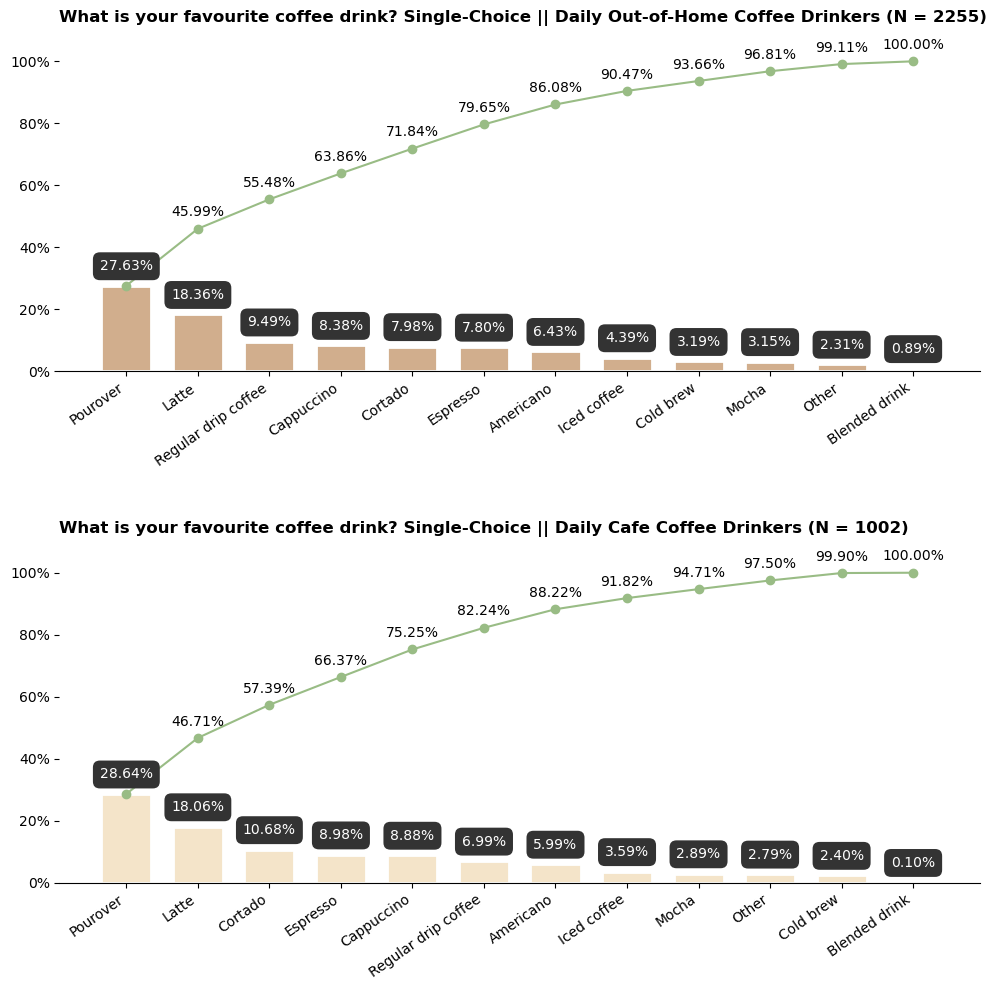

In [31]:
%%pyspark
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Convert Spark DataFrame to Pandas DataFrame
df_corrected4_pd = df_corrected4.toPandas()
df_corrected4b_pd = df_corrected4b.toPandas()

# Sort the dataframes based on 'Perc_Fav_Coffee' in ascending order
df_corrected4_pd = df_corrected4_pd.sort_values('Perc_Fav_Coffee', ascending=False)
df_corrected4b_pd = df_corrected4b_pd.sort_values('Perc_Fav_Coffee', ascending=False)

# Set the figure size
fig, axs = plt.subplots(2, figsize=(10, 10))  # Increased width

# Create an index for each category
index1 = np.arange(len(df_corrected4_pd['Daily_OOH_Coffee_Drinkers']))
index2 = np.arange(len(df_corrected4b_pd['Daily_Cafe_Coffee_Drinkers']))

# Define bar width
bar_width = 0.7

# Create clustered bar chart
p1 = axs[0].bar(index1, df_corrected4_pd['Perc_Fav_Coffee'], bar_width, color='#D1AE8D', edgecolor='white', linewidth=2, align='center')
p2 = axs[1].bar(index2, df_corrected4b_pd['Perc_Fav_Coffee'], bar_width, color='#F4E4C9', edgecolor='white', linewidth=2, align='center')

# Create cumulative percentage line
line1, = axs[0].plot(index1, df_corrected4_pd['Cumulative_Perc'], color='#99BC85', marker='o')
line2, = axs[1].plot(index2, df_corrected4b_pd['Cumulative_Perc'], color='#99BC85', marker='o')

# Add data labels
for i in range(len(p1)):
    axs[0].text(p1[i].get_x() + p1[i].get_width() / 2, p1[i].get_height() + 0.04, f'{p1[i].get_height():#.2%}', color='white', ha='center', va='bottom', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))  # Adjusted position
    axs[1].text(p2[i].get_x() + p2[i].get_width() / 2, p2[i].get_height() + 0.04, f'{p2[i].get_height():#.2%}', color='white', ha='center', va='bottom', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))  # Adjusted position


# Add data labels for the line
for i in range(1, len(line1.get_ydata())):
    if line1.get_ydata()[i] > line1.get_ydata()[i-1]:  # Only display the label if it's larger than the previous one
        axs[0].text(line1.get_xdata()[i], line1.get_ydata()[i] + 0.03, f'{line1.get_ydata()[i]:#.2%}', color='black', ha='center', va='bottom')  # Adjusted position
for i in range(1, len(line2.get_ydata())):
    if line2.get_ydata()[i] > line2.get_ydata()[i-1]:  # Only display the label if it's larger than the previous one
        axs[1].text(line2.get_xdata()[i], line2.get_ydata()[i] + 0.03, f'{line2.get_ydata()[i]:#.2%}', color='black', ha='center', va='bottom')  # Adjusted position

# Add title
axs[0].set_title("What is your favourite coffee drink? Single-Choice || Daily Out-of-Home Coffee Drinkers (N = " + str(df_corrected4_pd['question_base'].values[0]) + ")", loc='left', fontweight='bold')
axs[1].set_title("What is your favourite coffee drink? Single-Choice || Daily Cafe Coffee Drinkers (N = " + str(df_corrected4b_pd['question_base'].values[0]) + ")", loc='left', fontweight='bold')

# Set x-axis labels
axs[0].set_xticks(index1)
axs[0].set_xticklabels(df_corrected4_pd['Daily_OOH_Coffee_Drinkers'], rotation=35, ha='right')
axs[1].set_xticks(index2)
axs[1].set_xticklabels(df_corrected4b_pd['Daily_Cafe_Coffee_Drinkers'], rotation=35, ha='right')

# Remove borders
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Adjust y-axis limits
    ax.set_ylim(0, max(df_corrected4_pd['Cumulative_Perc'].max(), df_corrected4b_pd['Cumulative_Perc'].max()) + 0.1)

# Display the plot
plt.tight_layout()
plt.subplots_adjust(hspace = 0.5) 
plt.show()


**WHAT COFFEE DRINKS:** Pourover and Latte are the preferred coffee drinks among both target groups. By including other 6 specific SKUs on the menu - Regular Drip Coffee, Cortado, Espresso, Cappuccino, Americano, and Iced Coffee - for a total of 8 SKUs, it is possible to cater to over 90% of the coffee preferences of both Daily Out-of-Home Coffee Drinkers and Daily Cafe Coffee Drinkers.

In [33]:
USE Maven_Coffee_Challenge_Model;

-- Do you usually add anything to your coffee? Multi-Choice

SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Add_to_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 10 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Add_to_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 10 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

StatementMeta(, , -1, Finished, Available)

<Spark SQL result set with 0 rows and 0 fields>

<Spark SQL result set with 5 rows and 4 fields>

<Spark SQL result set with 5 rows and 4 fields>

In [36]:
%%pyspark
df_corrected5 = spark.sql("""
SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Add_to_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 10 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
""")

df_corrected5b = spark.sql("""
SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Add_to_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 10 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
""")

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 44, Finished, Available)

In [37]:
%%pyspark
!pip install matplotlib pandas

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 45, Finished, Available)

In [1]:
%%pyspark
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Convert Spark DataFrame to Pandas DataFrame
df_corrected5_pd = df_corrected5.toPandas()
df_corrected5b_pd = df_corrected5b.toPandas()

# Sort the 'Daily_Cafe_Coffee_Drinkers' dataframe based on 'Perc_Add_to_Coffee' in descending order
df_corrected5b_pd = df_corrected5b_pd.sort_values('Perc_Add_to_Coffee', ascending=True)

# Reindex the 'Daily_OOH_Coffee_Drinkers' dataframe based on the 'Daily_Cafe_Coffee_Drinkers' dataframe to ensure the same order of categories
df_corrected5_pd.set_index('Daily_OOH_Coffee_Drinkers', inplace=True)
df_corrected5_pd = df_corrected5_pd.reindex(index=df_corrected5b_pd['Daily_Cafe_Coffee_Drinkers'])
df_corrected5_pd.reset_index(inplace=True)

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create an index for each category
index = np.arange(len(df_corrected5_pd.index))

# Define bar width
bar_width = 0.35

# Create clustered bar chart
p1 = plt.barh(index, df_corrected5_pd['Perc_Add_to_Coffee'], bar_width, color='#D1AE8D', edgecolor='white', linewidth=2)
p2 = plt.barh(index + bar_width, df_corrected5b_pd['Perc_Add_to_Coffee'], bar_width, color='#F4E4C9', edgecolor='white', linewidth=2)

# Add data labels
for i in range(len(p1)):
    plt.text(p1[i].get_width() + 0.01, p1[i].get_y() + p1[i].get_height()/2, f'{p1[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))
    plt.text(p2[i].get_width() + 0.01, p2[i].get_y() + p2[i].get_height()/2, f'{p2[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))

# Add title
plt.title('Do you usually add anything to your coffee? Multi-Choice', loc='left', fontweight='bold')

# Set y-axis labels
plt.yticks(index + bar_width / 2, df_corrected5b_pd['Daily_Cafe_Coffee_Drinkers'])

# Set legend
plt.legend([p2, p1], ['Daily Cafe Coffee Drinkers (N = ' + str(df_corrected5b_pd['question_base'].values[0]) + ')', 'Daily Out-of-Home Coffee Drinkers (N = ' + str(df_corrected5_pd['question_base'].values[0]) + ')'], loc='lower right')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Format x-axis as percentage
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Display the plot
plt.show()


UsageError: Cell magic `%%pyspark` not found.


In [34]:
USE Maven_Coffee_Challenge_Model;

-- What kind of diary do you add? Multi-Choice

SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Diary_to_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 12 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Diary_to_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 12 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

StatementMeta(, , -1, Finished, Available)

<Spark SQL result set with 0 rows and 0 fields>

<Spark SQL result set with 9 rows and 4 fields>

<Spark SQL result set with 9 rows and 4 fields>

In [42]:
%%pyspark
df_corrected6 = spark.sql("""
SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Diary_to_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 12 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
""")

df_corrected6b = spark.sql("""
SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Diary_to_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 12 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
""")

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 50, Finished, Available)

In [43]:
%%pyspark
!pip install matplotlib pandas

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 51, Finished, Available)

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 101, Finished, Available)

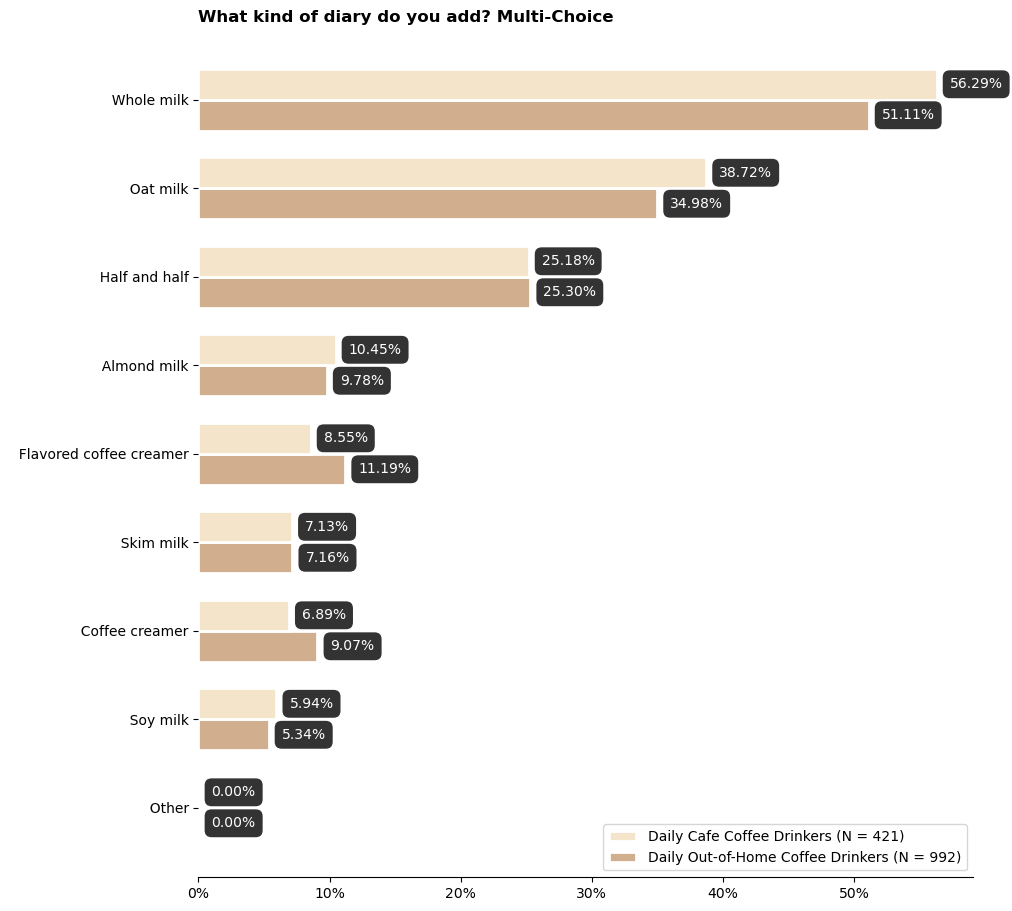

In [89]:
%%pyspark
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Convert Spark DataFrame to Pandas DataFrame
df_corrected6_pd = df_corrected6.toPandas()
df_corrected6b_pd = df_corrected6b.toPandas()

# Sort the 'Daily_Cafe_Coffee_Drinkers' dataframe based on 'Perc_Diary_to_Coffee' in descending order
df_corrected6b_pd = df_corrected6b_pd.sort_values('Perc_Diary_to_Coffee', ascending=True)

# Reindex the 'Daily_OOH_Coffee_Drinkers' dataframe based on the 'Daily_Cafe_Coffee_Drinkers' dataframe to ensure the same order of categories
df_corrected6_pd.set_index('Daily_OOH_Coffee_Drinkers', inplace=True)
df_corrected6_pd = df_corrected6_pd.reindex(index=df_corrected6b_pd['Daily_Cafe_Coffee_Drinkers'])
df_corrected6_pd.reset_index(inplace=True)

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 11))

# Create an index for each category
index = np.arange(len(df_corrected6_pd.index))

# Define bar width
bar_width = 0.35

# Create clustered bar chart
p1 = plt.barh(index, df_corrected6_pd['Perc_Diary_to_Coffee'], bar_width, color='#D1AE8D', edgecolor='white', linewidth=2)
p2 = plt.barh(index + bar_width, df_corrected6b_pd['Perc_Diary_to_Coffee'], bar_width, color='#F4E4C9', edgecolor='white', linewidth=2)

# Add data labels
for i in range(len(p1)):
    plt.text(p1[i].get_width() + 0.01, p1[i].get_y() + p1[i].get_height()/2, f'{p1[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))
    plt.text(p2[i].get_width() + 0.01, p2[i].get_y() + p2[i].get_height()/2, f'{p2[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))

# Add title
plt.title('What kind of diary do you add? Multi-Choice', loc='left', fontweight='bold')

# Set y-axis labels
plt.yticks(index + bar_width / 2, df_corrected6b_pd['Daily_Cafe_Coffee_Drinkers'])

# Set legend
plt.legend([p2, p1], ['Daily Cafe Coffee Drinkers (N = ' + str(df_corrected6b_pd['question_base'].values[0]) + ')', 'Daily Out-of-Home Coffee Drinkers (N = ' + str(df_corrected6_pd['question_base'].values[0]) + ')'], loc='lower right')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Format x-axis as percentage
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Display the plot
plt.show()


In [35]:
USE Maven_Coffee_Challenge_Model;

-- What kind of sugar or sweetener do you add? Multi-Choice

SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Sug_to_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 13 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Sug_to_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 13 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

-- What kind of flavoring do you add?
-- can't run this as this question was not rendering in the survey website

StatementMeta(, , -1, Finished, Available)

<Spark SQL result set with 0 rows and 0 fields>

<Spark SQL result set with 8 rows and 4 fields>

<Spark SQL result set with 8 rows and 4 fields>

In [86]:
%%pyspark
df_corrected7 = spark.sql("""
SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Sug_to_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 13 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
""")

df_corrected7b = spark.sql("""
SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Sug_to_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 13 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
""")

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 98, Finished, Available)

In [49]:
%%pyspark
!pip install matplotlib pandas

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 57, Finished, Available)

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 100, Finished, Available)

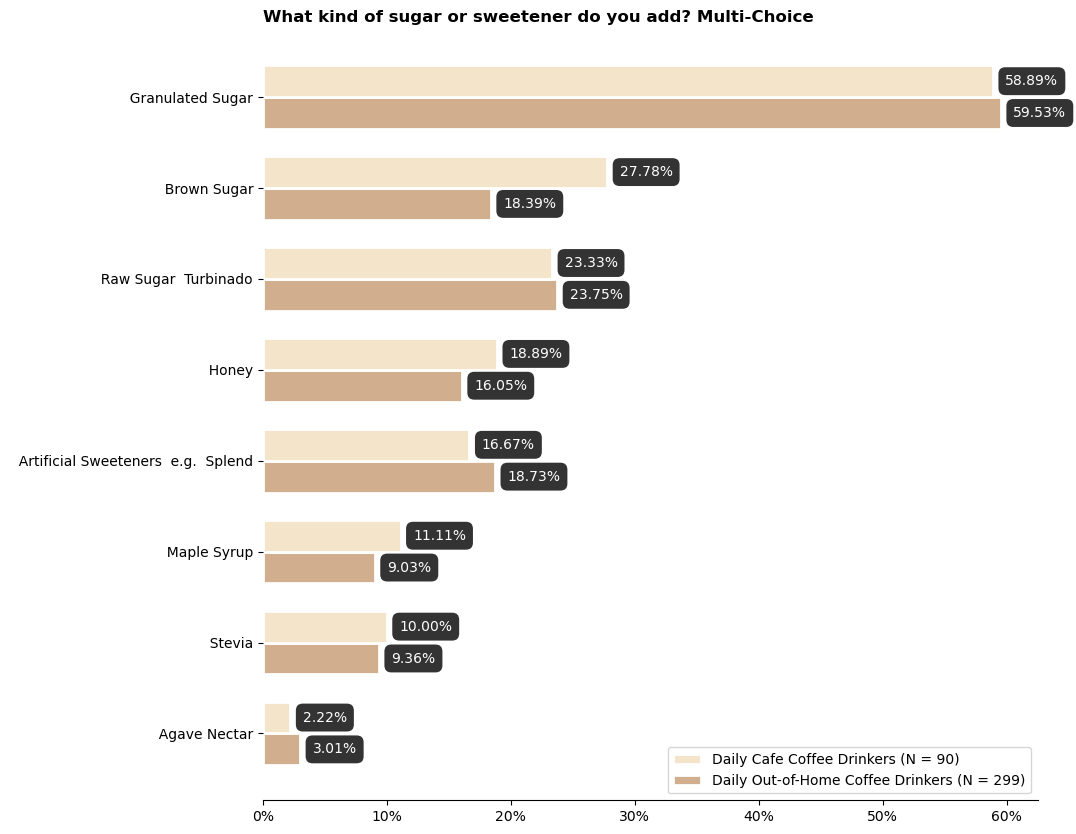

In [88]:
%%pyspark
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Convert Spark DataFrame to Pandas DataFrame
df_corrected7_pd = df_corrected7.toPandas()
df_corrected7b_pd = df_corrected7b.toPandas()

# Sort the 'Daily_Cafe_Coffee_Drinkers' dataframe based on 'Perc_Sug_to_Coffee' in descending order
df_corrected7b_pd = df_corrected7b_pd.sort_values('Perc_Sug_to_Coffee', ascending=True)

# Reindex the 'Daily_OOH_Coffee_Drinkers' dataframe based on the 'Daily_Cafe_Coffee_Drinkers' dataframe to ensure the same order of categories
df_corrected7_pd.set_index('Daily_OOH_Coffee_Drinkers', inplace=True)
df_corrected7_pd = df_corrected7_pd.reindex(index=df_corrected7b_pd['Daily_Cafe_Coffee_Drinkers'])
df_corrected7_pd.reset_index(inplace=True)

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Create an index for each category
index = np.arange(len(df_corrected7_pd.index))

# Define bar width
bar_width = 0.35

# Create clustered bar chart
p1 = plt.barh(index, df_corrected7_pd['Perc_Sug_to_Coffee'], bar_width, color='#D1AE8D', edgecolor='white', linewidth=2)
p2 = plt.barh(index + bar_width, df_corrected7b_pd['Perc_Sug_to_Coffee'], bar_width, color='#F4E4C9', edgecolor='white', linewidth=2)

# Add data labels
for i in range(len(p1)):
    plt.text(p1[i].get_width() + 0.01, p1[i].get_y() + p1[i].get_height()/2, f'{p1[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))
    plt.text(p2[i].get_width() + 0.01, p2[i].get_y() + p2[i].get_height()/2, f'{p2[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))

# Add title
plt.title('What kind of sugar or sweetener do you add? Multi-Choice', loc='left', fontweight='bold')

# Set y-axis labels
plt.yticks(index + bar_width / 2, df_corrected7b_pd['Daily_Cafe_Coffee_Drinkers'])

# Set legend
plt.legend([p2, p1], ['Daily Cafe Coffee Drinkers (N = ' + str(df_corrected7b_pd['question_base'].values[0]) + ')', 'Daily Out-of-Home Coffee Drinkers (N = ' + str(df_corrected7_pd['question_base'].values[0]) + ')'], loc='lower right')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Format x-axis as percentage
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Display the plot
plt.show()


**HOW:** Most coffee drinkers (especially the Daily Cafe Coffee Drinkers) prefer their coffee black. 

The most common additive is milk or a dairy product, particularly whole milk, half-and-half, and oat milk as vegan substitute to dairy. These should always be in the menu. 

Also, consider having granulated sugar, brown sugar, raw sugar turbinado, honey and artificial sweeteners available.

Flavor syrups are the less used additives, they could be included in the offer, but aren't a must to have, however due to some survey technical issues there isn't additional information on what flavoring respondents would add.


**WHAT COFFEE BEANS:** After having an understanding of both Daily Cafe Coffee Drinkers and Daily Out-of-Home Coffee Drinkers in terms of motivations for drinking coffee, and their favorite drinks and additives, let’s delve into **their preferences in terms of coffee itself**, including **the types of coffee, coffee strength and roasting level**.

Respondents were made to try 4 different types of coffee and, among several after-use questions, they were asked to openly write down few notes on each variety.

In [16]:
%%pyspark
df_corrected1 = spark.sql("""
SELECT Submission_ID, Question_Order, Question, Answer
FROM facts_questionnaire_results_Verbatims
WHERE Question_Order IN (24, 28, 32, 36) and Daily_Out_of_Home_Coffee_Drinkers = 1
""")

df_corrected1b = spark.sql("""
SELECT Submission_ID, Question_Order, Question, Answer
FROM facts_questionnaire_results_Verbatims
WHERE Question_Order IN (24, 28, 32, 36) and Daily_Cafe_Coffee_Drinkers = 1
""")

!pip install wordcloud matplotlib seaborn pyspark


StatementMeta(, ee60af3f-c76c-4558-9a78-4de950f3aee2, 25, Finished, Available)

StatementMeta(, ee60af3f-c76c-4558-9a78-4de950f3aee2, 26, Finished, Available)

StatementMeta(, ee60af3f-c76c-4558-9a78-4de950f3aee2, 27, Finished, Available)

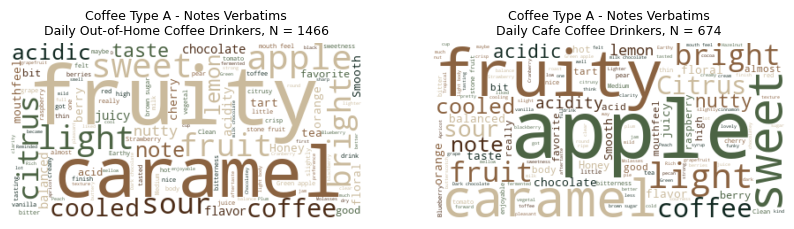

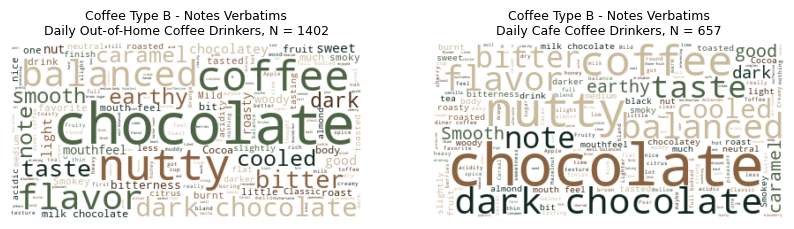

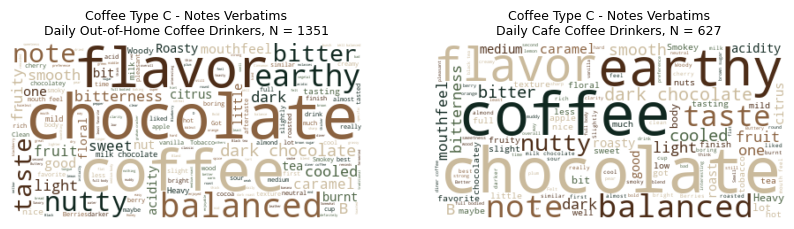

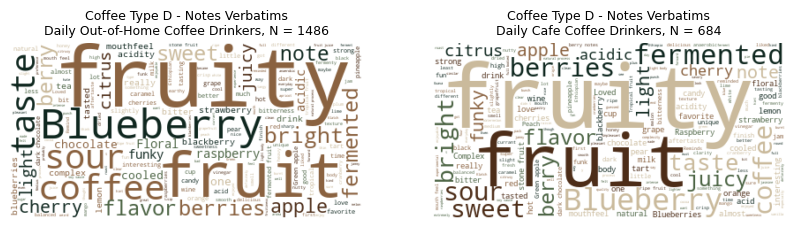

In [18]:
%%pyspark
# Convert both dataframes to Pandas for easier processing
df_pandas1 = df_corrected1.toPandas()
df_pandas2 = df_corrected1b.toPandas()

# Function to generate wordcloud
def generate_wordcloud(df, question_order):
    # Filter dataframe based on question order
    df_filtered = df[df['Question_Order'] == question_order]
    
    # Join all the answers into one big text
    text = ' '.join(answer for answer in df_filtered['Answer'])
    
    # Generate wordcloud
    wordcloud = WordCloud(background_color='white', 
                          color_func=lambda *args, **kwargs: random.choice(color_palette)).generate(text)
    
    # Return the generated wordcloud
    return wordcloud

# Generate wordclouds for each coffee type
for question_order in [24, 28, 32, 36]:
    # Calculate the number of distinct respondents for the current question in both dataframes
    num_respondents1 = df_pandas1[df_pandas1['Question_Order'] == question_order]['Submission_ID'].nunique()
    num_respondents2 = df_pandas2[df_pandas2['Question_Order'] == question_order]['Submission_ID'].nunique()
    
    # Generate wordcloud for the first group
    wordcloud1 = generate_wordcloud(df_pandas1, question_order)
    
    # Generate wordcloud for the second group
    wordcloud2 = generate_wordcloud(df_pandas2, question_order)
    
    # Create a subplot with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display the wordclouds side by side
    axs[0].imshow(wordcloud1, interpolation='bilinear')
    axs[0].axis("off")
    axs[0].set_title(f"Coffee Type {chr(65 + (question_order - 24) // 4)} - Notes Verbatims\nDaily Out-of-Home Coffee Drinkers, N = {num_respondents1}", fontsize=9)
    
    axs[1].imshow(wordcloud2, interpolation='bilinear')
    axs[1].axis("off")
    axs[1].set_title(f"Coffee Type {chr(65 + (question_order - 24) // 4)} - Notes Verbatims\nDaily Cafe Coffee Drinkers, N = {num_respondents2}", fontsize=9)
    
    # Show the plot
    plt.show()

please upload to lakehouse

please upload to lakehouse

please upload to lakehouse

What both Daily Out-of-Home Coffee Drinkers and Daily Cafe Coffee Drinkers highlighted in their comments can be summarized as follows: 

Coffee A: fruity coffee, with some caramel and/or apple taste, that is somehow sweet

Coffee B: nutty and chocolatey coffee that is somehow bitter.

Coffee C: earthy and chocolatey coffee that is overall balanced

Coffee D: fruity coffee with some blueberry taste that somehow fermented/sour.

Following the identification of the differences among the coffee types the respondents tried, the analysis aimed to understand the favorite varieties, to offer coffee beans that meet target groups needs, in the coffee shop.

In [23]:
-- Lastly, what was your favorite overall coffee? Single-Choice

SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Favourite_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 39 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Favourite_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 39 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

StatementMeta(, , -1, Finished, Available)

<Spark SQL result set with 4 rows and 4 fields>

<Spark SQL result set with 4 rows and 4 fields>

In [94]:
%%pyspark
df_corrected8 = spark.sql("""
SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Favourite_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 39 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
""")

df_corrected8b = spark.sql("""
SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Favourite_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 39 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
""")

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 106, Finished, Available)

In [79]:
%%pyspark
!pip install matplotlib pandas

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 91, Finished, Available)

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 112, Finished, Available)

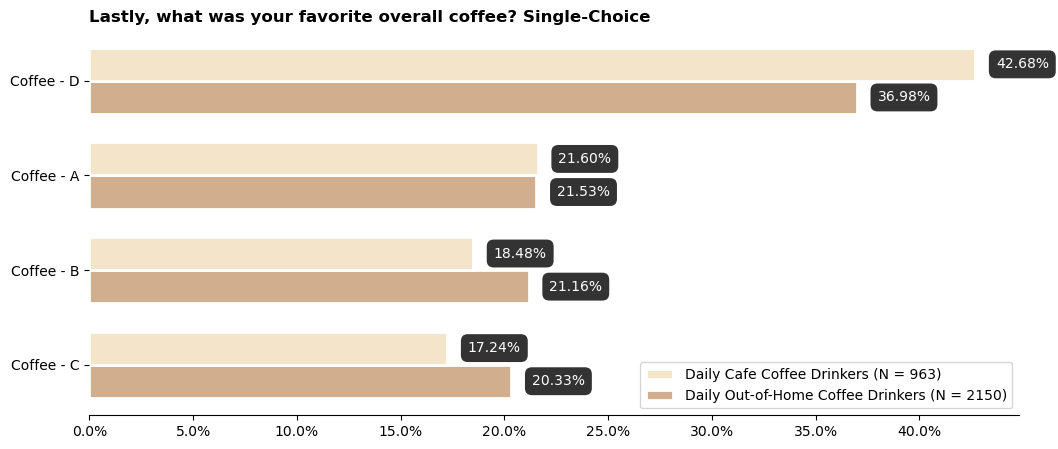

In [100]:
%%pyspark
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Convert Spark DataFrame to Pandas DataFrame
df_corrected8_pd = df_corrected8.toPandas()
df_corrected8b_pd = df_corrected8b.toPandas()

# Add "Coffee - " to each category
df_corrected8_pd['Daily_OOH_Coffee_Drinkers'] = 'Coffee - ' + df_corrected8_pd['Daily_OOH_Coffee_Drinkers']
df_corrected8b_pd['Daily_Cafe_Coffee_Drinkers'] = 'Coffee - ' + df_corrected8b_pd['Daily_Cafe_Coffee_Drinkers']

# Sort the 'Daily_Cafe_Coffee_Drinkers' dataframe based on 'Perc_Favourite_Coffee' in descending order
df_corrected8b_pd = df_corrected8b_pd.sort_values('Perc_Favourite_Coffee', ascending=True)

# Reindex the 'Daily_OOH_Coffee_Drinkers' dataframe based on the 'Daily_Cafe_Coffee_Drinkers' dataframe to ensure the same order of categories
df_corrected8_pd.set_index('Daily_OOH_Coffee_Drinkers', inplace=True)
df_corrected8_pd = df_corrected8_pd.reindex(index=df_corrected8b_pd['Daily_Cafe_Coffee_Drinkers'])
df_corrected8_pd.reset_index(inplace=True)

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 5))

# Create an index for each category
index = np.arange(len(df_corrected8_pd.index))

# Define bar width
bar_width = 0.35

# Create clustered bar chart
p1 = plt.barh(index, df_corrected8_pd['Perc_Favourite_Coffee'], bar_width, color='#D1AE8D', edgecolor='white', linewidth=2)
p2 = plt.barh(index + bar_width, df_corrected8b_pd['Perc_Favourite_Coffee'], bar_width, color='#F4E4C9', edgecolor='white', linewidth=2)

# Add data labels
for i in range(len(p1)):
    plt.text(p1[i].get_width() + 0.01, p1[i].get_y() + p1[i].get_height()/2, f'{p1[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))
    plt.text(p2[i].get_width() + 0.01, p2[i].get_y() + p2[i].get_height()/2, f'{p2[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))

# Add title
plt.title('Lastly, what was your favorite overall coffee? Single-Choice', loc='left', fontweight='bold')

# Set y-axis labels
plt.yticks(index + bar_width / 2, df_corrected8b_pd['Daily_Cafe_Coffee_Drinkers'])

# Set legend
plt.legend([p2, p1], ['Daily Cafe Coffee Drinkers (N = ' + str(df_corrected8b_pd['question_base'].values[0]) + ')', 'Daily Out-of-Home Coffee Drinkers (N = ' + str(df_corrected8_pd['question_base'].values[0]) + ')'], loc='lower right')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Format x-axis as percentage
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Display the plot
plt.show()


When respondents are directly prompted to choose their favorite variety, coffee D is the most praised, followed by coffee A (the two fruity coffees). This is particularly strong tendency among Daily Cafe Coffee Drinkers.

In [1]:
%%pyspark
df_corrected2 = spark.sql("""
SELECT
Submission_ID,
Question_Order,
Question,
Answer
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order in (23,27,31,35) and Daily_Out_of_Home_Coffee_Drinkers = 1
""")


df_corrected2b = spark.sql("""
SELECT
Submission_ID,
Question_Order,
Question,
Answer
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order in (23,27,31,35) and Daily_Cafe_Coffee_Drinkers = 1
""")

StatementMeta(, 97aa7c8d-6da1-4448-932b-a7985afec79e, 3, Finished, Available)

StatementMeta(, 97aa7c8d-6da1-4448-932b-a7985afec79e, 4, Finished, Available)

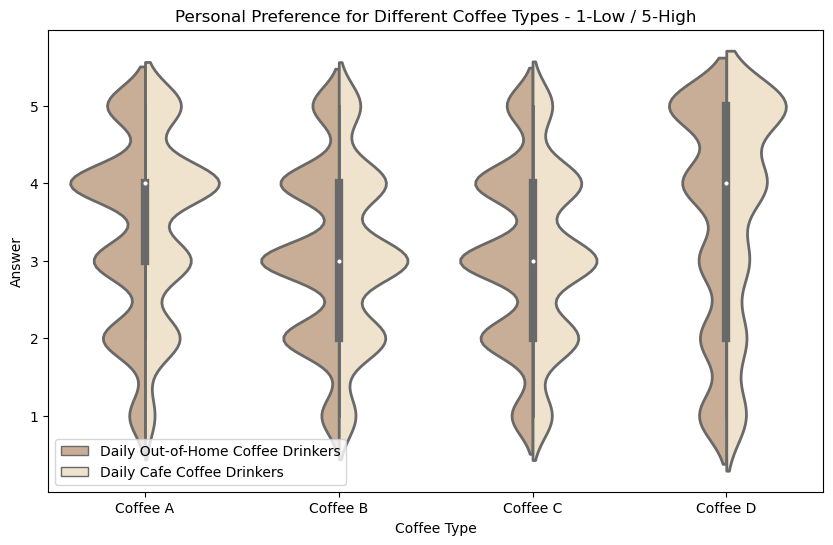

In [2]:
%%pyspark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert both dataframes to Pandas for easier processing
df_pandas1 = df_corrected2.toPandas()
df_pandas2 = df_corrected2b.toPandas()

# Add a new column to distinguish the two groups
df_pandas1['Group'] = 'Daily Out-of-Home Coffee Drinkers'
df_pandas2['Group'] = 'Daily Cafe Coffee Drinkers'

# Concatenate the two dataframes
df_pandas = pd.concat([df_pandas1, df_pandas2])

# Create a dictionary to map question orders to coffee types
coffee_type_dict = {23: 'Coffee A', 27: 'Coffee B', 31: 'Coffee C', 35: 'Coffee D'}

# Replace the question orders with coffee types
df_pandas['Question_Order'] = df_pandas['Question_Order'].map(coffee_type_dict)

# Convert 'Answer' to numeric and limit its range to 1-5
df_pandas['Answer'] = pd.to_numeric(df_pandas['Answer'], errors='coerce')
df_pandas['Answer'] = df_pandas['Answer'].clip(1, 5)

# Create the violin plot
plt.figure(figsize=(10, 6))
violin_plot = sns.violinplot(y='Answer', x='Question_Order', hue='Group', data=df_pandas, palette={'Daily Out-of-Home Coffee Drinkers': '#D1AE8D', 'Daily Cafe Coffee Drinkers': '#F4E4C9'}, split=True, linewidth=2, scale_hue=False, order=['Coffee A', 'Coffee B', 'Coffee C', 'Coffee D'])

# Set the title and labels
plt.title('Personal Preference for Different Coffee Types - 1-Low / 5-High')
plt.ylabel('Answer')
plt.xlabel('Coffee Type')

# Move the legend to bottom left
plt.legend(loc='lower left')

# Show the plot
plt.show()


When respondents are asked to rate their personal preference for each coffee separately, on a scale from 1 to 5, the median answer for coffees A and C is 4 while is 3 for coffees B and C.

This highlights how both fruity varieties gather indeed higher appreciation, although coffee D is skewed towards even higher appreciation than coffee A, with respondents that are more inclined to give the highest appreciation to coffee D vs. coffee A.

This gives the indication that it should be considered to have in the coffee shop a fruity variety, and possibly, one that has a slight blueberry retro-taste and is somehow sour.

Next it will be important to understand which kind of coffee varieties coffee drinkers claim to like overall, when specifically prompted, in order to have in the coffee shop a broader offer that goes behind fruity coffees.

In [68]:
USE Maven_Coffee_Challenge_Model;

-- Before today's tasting, which of the following best described what kind of coffee you like? Single-Choice

SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Kind_Coffee,
sum(sum(Answer)  / count(DISTINCT Submission_ID)) OVER (ORDER BY sum(Answer)  / 
count(DISTINCT Submission_ID) DESC, Answer_Choices) as Cumulative_Perc, -- in the group by i added Aswer_Choice as I had 2 cate with same sum(Answer)
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 16 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Kind_Coffee,
sum(sum(Answer)  / count(DISTINCT Submission_ID)) OVER (ORDER BY sum(Answer)  / 
count(DISTINCT Submission_ID) DESC) as Cumulative_Perc,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 16 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

StatementMeta(, , -1, Finished, Available)

<Spark SQL result set with 0 rows and 0 fields>

<Spark SQL result set with 10 rows and 5 fields>

<Spark SQL result set with 10 rows and 5 fields>

In [96]:
%%pyspark
df_corrected9 = spark.sql("""
SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Kind_Coffee,
sum(sum(Answer)  / count(DISTINCT Submission_ID)) OVER (ORDER BY sum(Answer)  / 
count(DISTINCT Submission_ID) DESC, Answer_Choices) as Cumulative_Perc, -- in the group by i added Aswer_Choice as I had 2 cate with same sum(Answer)
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 16 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
""")

df_corrected9b = spark.sql("""
SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Kind_Coffee,
sum(sum(Answer)  / count(DISTINCT Submission_ID)) OVER (ORDER BY sum(Answer)  / 
count(DISTINCT Submission_ID) DESC) as Cumulative_Perc,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 16 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
""")

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 108, Finished, Available)

In [97]:
%%pyspark
!pip install matplotlib pandas

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 109, Finished, Available)

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 114, Finished, Available)

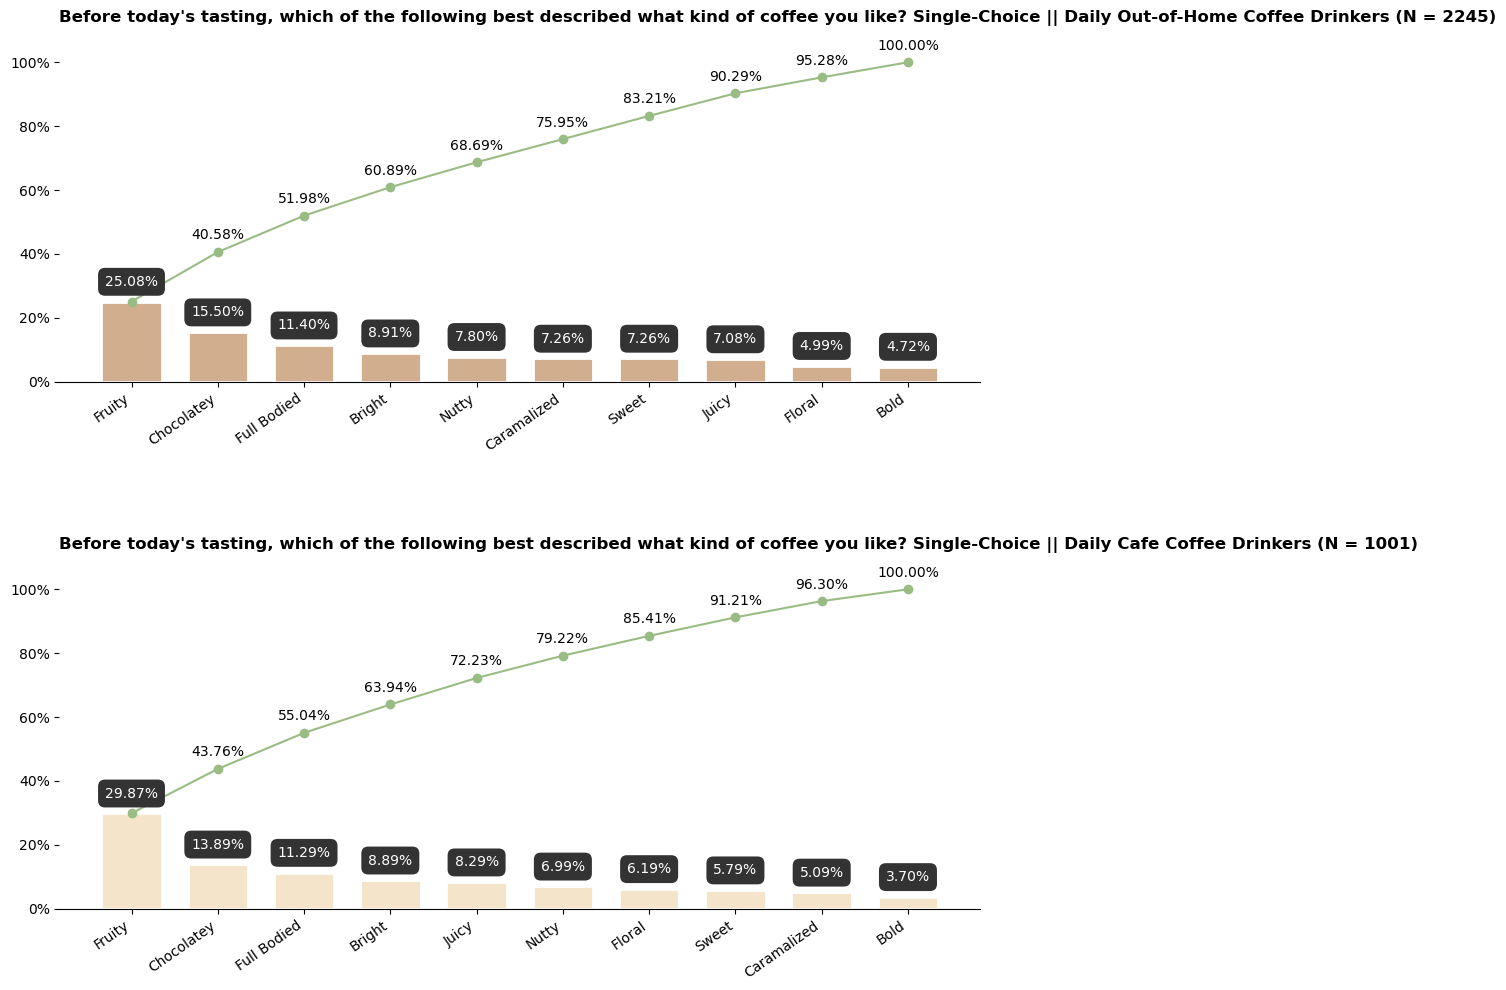

In [102]:
%%pyspark

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Convert Spark DataFrame to Pandas DataFrame
df_corrected9_pd = df_corrected9.toPandas()
df_corrected9b_pd = df_corrected9b.toPandas()

# Sort the dataframes based on 'Perc_Kind_Coffee' in ascending order
df_corrected9_pd = df_corrected9_pd.sort_values('Perc_Kind_Coffee', ascending=False)
df_corrected9b_pd = df_corrected9b_pd.sort_values('Perc_Kind_Coffee', ascending=False)

# Set the figure size
fig, axs = plt.subplots(2, figsize=(10, 10))  # Increased width

# Create an index for each category
index1 = np.arange(len(df_corrected9_pd['Daily_OOH_Coffee_Drinkers']))
index2 = np.arange(len(df_corrected9b_pd['Daily_Cafe_Coffee_Drinkers']))

# Define bar width
bar_width = 0.7

# Create clustered bar chart
p1 = axs[0].bar(index1, df_corrected9_pd['Perc_Kind_Coffee'], bar_width, color='#D1AE8D', edgecolor='white', linewidth=2, align='center')
p2 = axs[1].bar(index2, df_corrected9b_pd['Perc_Kind_Coffee'], bar_width, color='#F4E4C9', edgecolor='white', linewidth=2, align='center')

# Create cumulative percentage line
line1, = axs[0].plot(index1, df_corrected9_pd['Cumulative_Perc'], color='#99BC85', marker='o')
line2, = axs[1].plot(index2, df_corrected9b_pd['Cumulative_Perc'], color='#99BC85', marker='o')

# Add data labels
for i in range(len(p1)):
    axs[0].text(p1[i].get_x() + p1[i].get_width() / 2, p1[i].get_height() + 0.04, f'{p1[i].get_height():#.2%}', color='white', ha='center', va='bottom', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))  # Adjusted position
    axs[1].text(p2[i].get_x() + p2[i].get_width() / 2, p2[i].get_height() + 0.04, f'{p2[i].get_height():#.2%}', color='white', ha='center', va='bottom', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))  # Adjusted position

# Add data labels for the line
for i in range(1, len(line1.get_ydata())):
    if line1.get_ydata()[i] > line1.get_ydata()[i-1]:  # Only display the label if it's larger than the previous one
        axs[0].text(line1.get_xdata()[i], line1.get_ydata()[i] + 0.03, f'{line1.get_ydata()[i]:#.2%}', color='black', ha='center', va='bottom')  # Adjusted position
for i in range(1, len(line2.get_ydata())):
    if line2.get_ydata()[i] > line2.get_ydata()[i-1]:  # Only display the label if it's larger than the previous one
        axs[1].text(line2.get_xdata()[i], line2.get_ydata()[i] + 0.03, f'{line2.get_ydata()[i]:#.2%}', color='black', ha='center', va='bottom')  # Adjusted position

# Add title
axs[0].set_title("Before today's tasting, which of the following best described what kind of coffee you like? Single-Choice || Daily Out-of-Home Coffee Drinkers (N = " + str(df_corrected9_pd['question_base'].values[0]) + ")", loc='left', fontweight='bold')
axs[1].set_title("Before today's tasting, which of the following best described what kind of coffee you like? Single-Choice || Daily Cafe Coffee Drinkers (N = " + str(df_corrected9b_pd['question_base'].values[0]) + ")", loc='left', fontweight='bold')

# Set x-axis labels
axs[0].set_xticks(index1)
axs[0].set_xticklabels(df_corrected9_pd['Daily_OOH_Coffee_Drinkers'], rotation=35, ha='right')
axs[1].set_xticks(index2)
axs[1].set_xticklabels(df_corrected9b_pd['Daily_Cafe_Coffee_Drinkers'], rotation=35, ha='right')

# Remove borders
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Adjust y-axis limits
    ax.set_ylim(0, max(df_corrected9_pd['Cumulative_Perc'].max(), df_corrected9b_pd['Cumulative_Perc'].max()) + 0.1)

# Display the plot
plt.tight_layout()
plt.subplots_adjust(hspace = 0.5) 
plt.show()


More than 60% of both Daily Out-of-Home Coffee Drinkers and Daily Cafe Coffee Drinkers claim they liked Fruity (that also in this case emerges to be on top of the list), Chocolatey, Full-bodied, and Bright types of coffees. 

Including these 4 coffee SKUs in the coffee shop offer should be a must. 

On top of that, depending on the target group, there are other types of coffees that, if included, would cover a wider range of Coffee Drinkers’ preferences.

As the coffee shop is just opening, and the ‘Daily Cafe Coffee Drinkers’ form the core customer base, their satisfaction is critical to success. Including Juicy, Nutty, Floral, and Sweet coffee beans in the menu would cover more than 91% of their preferences. If there are resources to do so, including also Caramelized coffee would guarantee more than 95% of coverage of coffee tastes for both targeted audiences.

Finally, let's delve into coffee strength and roasting level of the coffee beans.

In [76]:
USE Maven_Coffee_Challenge_Model;

-- How strong do you like your coffee? Single-Choice

SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_strong_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 17 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_strong_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 17 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

StatementMeta(, , -1, Finished, Available)

<Spark SQL result set with 0 rows and 0 fields>

<Spark SQL result set with 5 rows and 4 fields>

<Spark SQL result set with 5 rows and 4 fields>

In [103]:
%%pyspark
df_corrected10 = spark.sql("""
SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_strong_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 17 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
""")

df_corrected10b = spark.sql("""
SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_strong_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 17 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
""")

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 115, Finished, Available)

In [104]:
%%pyspark
!pip install matplotlib pandas

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 116, Finished, Available)

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 120, Finished, Available)

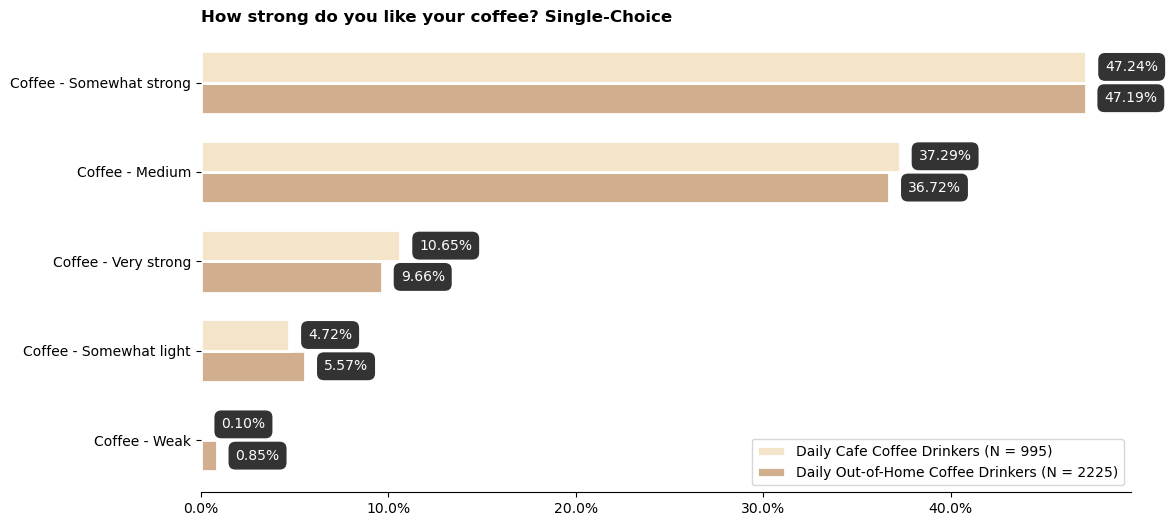

In [108]:
%%pyspark
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Convert Spark DataFrame to Pandas DataFrame
df_corrected10_pd = df_corrected10.toPandas()
df_corrected10b_pd = df_corrected10b.toPandas()

# Add "Coffee - " to each category
df_corrected10_pd['Daily_OOH_Coffee_Drinkers'] = 'Coffee - ' + df_corrected10_pd['Daily_OOH_Coffee_Drinkers']
df_corrected10b_pd['Daily_Cafe_Coffee_Drinkers'] = 'Coffee - ' + df_corrected10b_pd['Daily_Cafe_Coffee_Drinkers']

# Sort the 'Daily_Cafe_Coffee_Drinkers' dataframe based on 'Perc_strong_Coffee' in descending order
df_corrected10b_pd = df_corrected10b_pd.sort_values('Perc_strong_Coffee', ascending=True)

# Reindex the 'Daily_OOH_Coffee_Drinkers' dataframe based on the 'Daily_Cafe_Coffee_Drinkers' dataframe to ensure the same order of categories
df_corrected10_pd.set_index('Daily_OOH_Coffee_Drinkers', inplace=True)
df_corrected10_pd = df_corrected10_pd.reindex(index=df_corrected10b_pd['Daily_Cafe_Coffee_Drinkers'])
df_corrected10_pd.reset_index(inplace=True)

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Create an index for each category
index = np.arange(len(df_corrected10_pd.index))

# Define bar width
bar_width = 0.35

# Create clustered bar chart
p1 = plt.barh(index, df_corrected10_pd['Perc_strong_Coffee'], bar_width, color='#D1AE8D', edgecolor='white', linewidth=2)
p2 = plt.barh(index + bar_width, df_corrected10b_pd['Perc_strong_Coffee'], bar_width, color='#F4E4C9', edgecolor='white', linewidth=2)

# Add data labels
for i in range(len(p1)):
    plt.text(p1[i].get_width() + 0.01, p1[i].get_y() + p1[i].get_height()/2, f'{p1[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))
    plt.text(p2[i].get_width() + 0.01, p2[i].get_y() + p2[i].get_height()/2, f'{p2[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))

# Add title
plt.title('How strong do you like your coffee? Single-Choice', loc='left', fontweight='bold')

# Set y-axis labels
plt.yticks(index + bar_width / 2, df_corrected10b_pd['Daily_Cafe_Coffee_Drinkers'])

# Set legend
plt.legend([p2, p1], ['Daily Cafe Coffee Drinkers (N = ' + str(df_corrected10b_pd['question_base'].values[0]) + ')', 'Daily Out-of-Home Coffee Drinkers (N = ' + str(df_corrected10_pd['question_base'].values[0]) + ')'], loc='lower right')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Format x-axis as percentage
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Display the plot
plt.show()


In [77]:
USE Maven_Coffee_Challenge_Model;

-- What roast level of coffee do you prefer? Single-Choice

SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_RoastLevel_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 18 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;

SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_RoastLevel_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 18 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
order by 2 DESC;


StatementMeta(, , -1, Finished, Available)

<Spark SQL result set with 0 rows and 0 fields>

<Spark SQL result set with 7 rows and 4 fields>

<Spark SQL result set with 7 rows and 4 fields>

In [105]:
%%pyspark
df_corrected11 = spark.sql("""
SELECT
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_RoastLevel_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 18 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Answer_Choices
""")

df_corrected11b = spark.sql("""
SELECT
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_RoastLevel_Coffee,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
Facts_Questionnaire_FullTable_NoVerbat
where 
Question_Order = 18 and
Daily_Cafe_Coffee_Drinkers = 1
group by Answer_Choices
""")

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 117, Finished, Available)

In [106]:
%%pyspark
!pip install matplotlib pandas

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 118, Finished, Available)

StatementMeta(, ba86a8a5-dc63-463e-8a8f-78a173bca5ee, 123, Finished, Available)

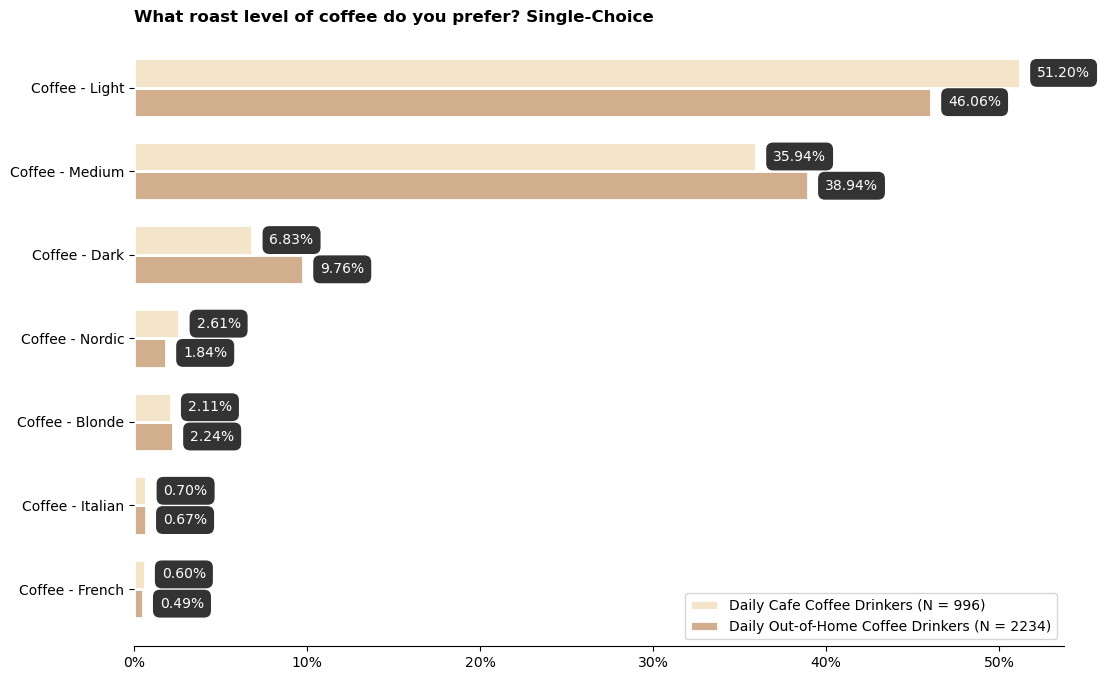

In [111]:
%%pyspark
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Convert Spark DataFrame to Pandas DataFrame
df_corrected11_pd = df_corrected11.toPandas()
df_corrected11b_pd = df_corrected11b.toPandas()

# Add "Coffee - " to each category
df_corrected11_pd['Daily_OOH_Coffee_Drinkers'] = 'Coffee - ' + df_corrected11_pd['Daily_OOH_Coffee_Drinkers']
df_corrected11b_pd['Daily_Cafe_Coffee_Drinkers'] = 'Coffee - ' + df_corrected11b_pd['Daily_Cafe_Coffee_Drinkers']

# Sort the 'Daily_Cafe_Coffee_Drinkers' dataframe based on 'Perc_RoastLevel_Coffee' in descending order
df_corrected11b_pd = df_corrected11b_pd.sort_values('Perc_RoastLevel_Coffee', ascending=True)

# Reindex the 'Daily_OOH_Coffee_Drinkers' dataframe based on the 'Daily_Cafe_Coffee_Drinkers' dataframe to ensure the same order of categories
df_corrected11_pd.set_index('Daily_OOH_Coffee_Drinkers', inplace=True)
df_corrected11_pd = df_corrected11_pd.reindex(index=df_corrected11b_pd['Daily_Cafe_Coffee_Drinkers'])
df_corrected11_pd.reset_index(inplace=True)

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Create an index for each category
index = np.arange(len(df_corrected11_pd.index))

# Define bar width
bar_width = 0.35

# Create clustered bar chart
p1 = plt.barh(index, df_corrected11_pd['Perc_RoastLevel_Coffee'], bar_width, color='#D1AE8D', edgecolor='white', linewidth=2)
p2 = plt.barh(index + bar_width, df_corrected11b_pd['Perc_RoastLevel_Coffee'], bar_width, color='#F4E4C9', edgecolor='white', linewidth=2)

# Add data labels
for i in range(len(p1)):
    plt.text(p1[i].get_width() + 0.01, p1[i].get_y() + p1[i].get_height()/2, f'{p1[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))
    plt.text(p2[i].get_width() + 0.01, p2[i].get_y() + p2[i].get_height()/2, f'{p2[i].get_width():#.2%}', color='white', ha='left', va='center', bbox=dict(facecolor='#333333', edgecolor='none', boxstyle='round,pad=0.5'))

# Add title
plt.title('What roast level of coffee do you prefer? Single-Choice', loc='left', fontweight='bold')

# Set y-axis labels
plt.yticks(index + bar_width / 2, df_corrected11b_pd['Daily_Cafe_Coffee_Drinkers'])

# Set legend
plt.legend([p2, p1], ['Daily Cafe Coffee Drinkers (N = ' + str(df_corrected11b_pd['question_base'].values[0]) + ')', 'Daily Out-of-Home Coffee Drinkers (N = ' + str(df_corrected11_pd['question_base'].values[0]) + ')'], loc='lower right')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Format x-axis as percentage
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Display the plot
plt.show()


The majority of the respondents belonging to both target audiences prefer a medium-strong coffee with light-medium roasted coffee grains, therefore it is advised to prioritize coffee grains with these features. 

It is also recommended to include in the menu very strong coffee and dark roasted grains options, as these grains types are appreciated by around 7%-11% of respondents, across target groups.

To conclude this section on Target Audience Preferences, in terms of coffee drinks and additives, coffee beans type, strength and roasting, here below a summarization matrix, as guidance for the coffee shop opening.

In [1]:
%%pyspark
import pandas as pd
from IPython.display import display, HTML

# Define the data for the matrix
data = {
    "Must Have": {
        "Coffee Drinks": "\n".join(["Pourover", "Latte", "Cortado", "Espresso", "Cappuccino", "Regular drip coffee", "Americo", "Iced Coffee"]),
        "Coffee Additives - Diary": "\n".join(["Whole milk", "Half and half", "Oat milk"]),
        "Coffee Additives - Sugar": "\n".join(["Granulated sugar", "Brown sugar", "Raw Sugar Turbinado", "Artificial sweeteners", "Honey"]),
        "Coffee Beans Types": "\n".join(["Fruity", "Chocolatey", "Full Bodied", "Bright"]),
        "Coffee Strength & Roasting Level": "Medium-strong coffee\nLight-medium roasting"
    },
    "Optional": {
        "Coffee Drinks": "\n".join(["Mocha", "Blended drink", "Cold brew"]),
        "Coffee Additives - Diary": "\n".join(["Flavored coffee creamer", "Almond milk", "Coffee creamer", "Skim milk", "Soy milk"]),
        "Coffee Additives - Sugar": "\n".join(["Maple syrup", "Stevia", "Agave Nectar"]),
        "Coffee Beans Types": "\n".join(["Juicy", "Nutty", "Floral", "Sweet", "Caramelized"]),
        "Coffee Strength & Roasting Level": "Very strong coffee\nDark roasting"
    }
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Style the DataFrame
styled_df = df.style.set_properties(**{'text-align': 'left', 'white-space': 'pre', 'font-size': '120%'})

# Center the column headers and set the width of the row headers and the columns
styled_df.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'left'), ('font-size', '150%'), ('width', '300px')]},  # Adjust the width as needed
    {'selector': 'td', 'props': [('width', '300px')]}  # Adjust the width as needed
])

# Display the styled DataFrame with a title
display(HTML('<h3 style="text-align: left;">Menu Prioritization Analysis for the Coffee Shop Opening</h3>'))
display(styled_df)


StatementMeta(, 754d7f26-814a-4170-ae46-ae68bec64303, 3, Finished, Available)

,Must Have,Optional
Coffee Drinks,Pourover Latte Cortado Espresso Cappuccino Regular drip coffee Americo Iced Coffee,Mocha Blended drink Cold brew
Coffee Additives - Diary,Whole milk Half and half Oat milk,Flavored coffee creamer Almond milk Coffee creamer Skim milk Soy milk
Coffee Additives - Sugar,Granulated sugar Brown sugar Raw Sugar Turbinado Artificial sweeteners Honey,Maple syrup Stevia Agave Nectar
Coffee Beans Types,Fruity Chocolatey Full Bodied Bright,Juicy Nutty Floral Sweet Caramelized
Coffee Strength & Roasting Level,Medium-strong coffee Light-medium roasting,Very strong coffee Dark roasting


### Pricing Strategy ###

**Stakeholders question: "How can we align prices with customer value perception?"**

To provide the stakeholders with actionable insights on prices it has decided to use the survey question _"What is the most you'd ever be willing to pay for a cup of coffee? Single-Choice"_ as it represents what respondents, in their ideal world, would consider as their maximum price for a cup of coffee. 

On top of that, respondents have their favorite coffee drinks, and, here it was done an assumption: if a respondent has a favorite coffee drink (e.g., espresso), it is likely that respondent would consider his/her maximum price to pay thinking about his favorite coffee drink (espresso). 

This assumption was made to split the answers of the willingness to pay question by favorite drinks, to provide a somewhat more accurate price direction for each of the 8 coffee drinks that we labeled as "must have" in the menu.

In [24]:
USE Maven_Coffee_Challenge_Model;

-- What is the most you'd ever be willing to pay for a cup of coffee? Single-Choice

with drinks as (
SELECT
Submission_ID,
Answer_Choices as Coffee_Drink
from
Facts_Questionnaire_FullTable_NoVerbat
WHERE Question_Order = 8 and Answer = 1
),

ful_tab_drinks as (
select Facts_Questionnaire_FullTable_NoVerbat.*, drinks.Coffee_Drink
FROM
Facts_Questionnaire_FullTable_NoVerbat
left JOIN drinks
ON drinks.Submission_ID = Facts_Questionnaire_FullTable_NoVerbat.Submission_ID
)

SELECT
Coffee_Drink,
Answer_Choices as Daily_OOH_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Willing_Pay,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
ful_tab_drinks
where 
Question_Order = 47 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Coffee_Drink, Answer_Choices
ORDER BY 
5 DESC,
CASE 
    WHEN Answer_Choices = 'Less than $2' THEN 1
    WHEN Answer_Choices = '$2-$4' THEN 2
    WHEN Answer_Choices = '$4-$6' THEN 3
    WHEN Answer_Choices = '$6-$8' THEN 4
    WHEN Answer_Choices = '$8-$10' THEN 5
    WHEN Answer_Choices = '$10-$15' THEN 6
    WHEN Answer_Choices = '$15-$20' THEN 7
    WHEN Answer_Choices = 'More than $20' THEN 8
    ELSE 9
END;

with drinks as (
SELECT
Submission_ID,
Answer_Choices as Coffee_Drink
from
Facts_Questionnaire_FullTable_NoVerbat
WHERE Question_Order = 8 and Answer = 1
),

ful_tab_drinks as (
select Facts_Questionnaire_FullTable_NoVerbat.*, drinks.Coffee_Drink
FROM
Facts_Questionnaire_FullTable_NoVerbat
left JOIN drinks
ON drinks.Submission_ID = Facts_Questionnaire_FullTable_NoVerbat.Submission_ID
)

SELECT
Coffee_Drink,
Answer_Choices as Daily_Cafe_Coffee_Drinkers,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Willing_Pay,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
ful_tab_drinks
where 
Question_Order = 47 and
Daily_Cafe_Coffee_Drinkers = 1 
group by Coffee_Drink, Answer_Choices
ORDER BY 
5 DESC,
CASE 
    WHEN Answer_Choices = 'Less than $2' THEN 1
    WHEN Answer_Choices = '$2-$4' THEN 2
    WHEN Answer_Choices = '$4-$6' THEN 3
    WHEN Answer_Choices = '$6-$8' THEN 4
    WHEN Answer_Choices = '$8-$10' THEN 5
    WHEN Answer_Choices = '$10-$15' THEN 6
    WHEN Answer_Choices = '$15-$20' THEN 7
    WHEN Answer_Choices = 'More than $20' THEN 8
    ELSE 9
END;


StatementMeta(, , -1, Finished, Available)

<Spark SQL result set with 0 rows and 0 fields>

<Spark SQL result set with 96 rows and 5 fields>

<Spark SQL result set with 96 rows and 5 fields>

In [2]:
%%pyspark
df_corrected12 = spark.sql("""
with drinks as (
SELECT
Submission_ID,
Answer_Choices as Coffee_Drink
from
Facts_Questionnaire_FullTable_NoVerbat
WHERE Question_Order = 8 and Answer = 1
),

ful_tab_drinks as (
select Facts_Questionnaire_FullTable_NoVerbat.*, drinks.Coffee_Drink
FROM
Facts_Questionnaire_FullTable_NoVerbat
left JOIN drinks
ON drinks.Submission_ID = Facts_Questionnaire_FullTable_NoVerbat.Submission_ID
)

SELECT
Coffee_Drink,
Answer_Choices,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Willing_Pay,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
ful_tab_drinks
where 
Question_Order = 47 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Coffee_Drink, Answer_Choices
ORDER BY 
5 DESC,
CASE 
    WHEN Answer_Choices = 'Less than $2' THEN 1
    WHEN Answer_Choices = '$2-$4' THEN 2
    WHEN Answer_Choices = '$4-$6' THEN 3
    WHEN Answer_Choices = '$6-$8' THEN 4
    WHEN Answer_Choices = '$8-$10' THEN 5
    WHEN Answer_Choices = '$10-$15' THEN 6
    WHEN Answer_Choices = '$15-$20' THEN 7
    WHEN Answer_Choices = 'More than $20' THEN 8
    ELSE 9
END
""")

df_corrected12b = spark.sql("""
with drinks as (
SELECT
Submission_ID,
Answer_Choices as Coffee_Drink
from
Facts_Questionnaire_FullTable_NoVerbat
WHERE Question_Order = 8 and Answer = 1
),

ful_tab_drinks as (
select Facts_Questionnaire_FullTable_NoVerbat.*, drinks.Coffee_Drink
FROM
Facts_Questionnaire_FullTable_NoVerbat
left JOIN drinks
ON drinks.Submission_ID = Facts_Questionnaire_FullTable_NoVerbat.Submission_ID
)

SELECT
Coffee_Drink,
Answer_Choices,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Willing_Pay,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
ful_tab_drinks
where 
Question_Order = 47 and
Daily_Cafe_Coffee_Drinkers = 1 
group by Coffee_Drink, Answer_Choices
ORDER BY 
5 DESC,
CASE 
    WHEN Answer_Choices = 'Less than $2' THEN 1
    WHEN Answer_Choices = '$2-$4' THEN 2
    WHEN Answer_Choices = '$4-$6' THEN 3
    WHEN Answer_Choices = '$6-$8' THEN 4
    WHEN Answer_Choices = '$8-$10' THEN 5
    WHEN Answer_Choices = '$10-$15' THEN 6
    WHEN Answer_Choices = '$15-$20' THEN 7
    WHEN Answer_Choices = 'More than $20' THEN 8
    ELSE 9
END
""")

StatementMeta(, 754d7f26-814a-4170-ae46-ae68bec64303, 4, Finished, Available)

In [3]:
%%pyspark
pip install matplotlib seaborn


StatementMeta(, 754d7f26-814a-4170-ae46-ae68bec64303, 5, Finished, Available)

Note: you may need to restart the kernel to use updated packages.


StatementMeta(, 754d7f26-814a-4170-ae46-ae68bec64303, 8, Finished, Available)

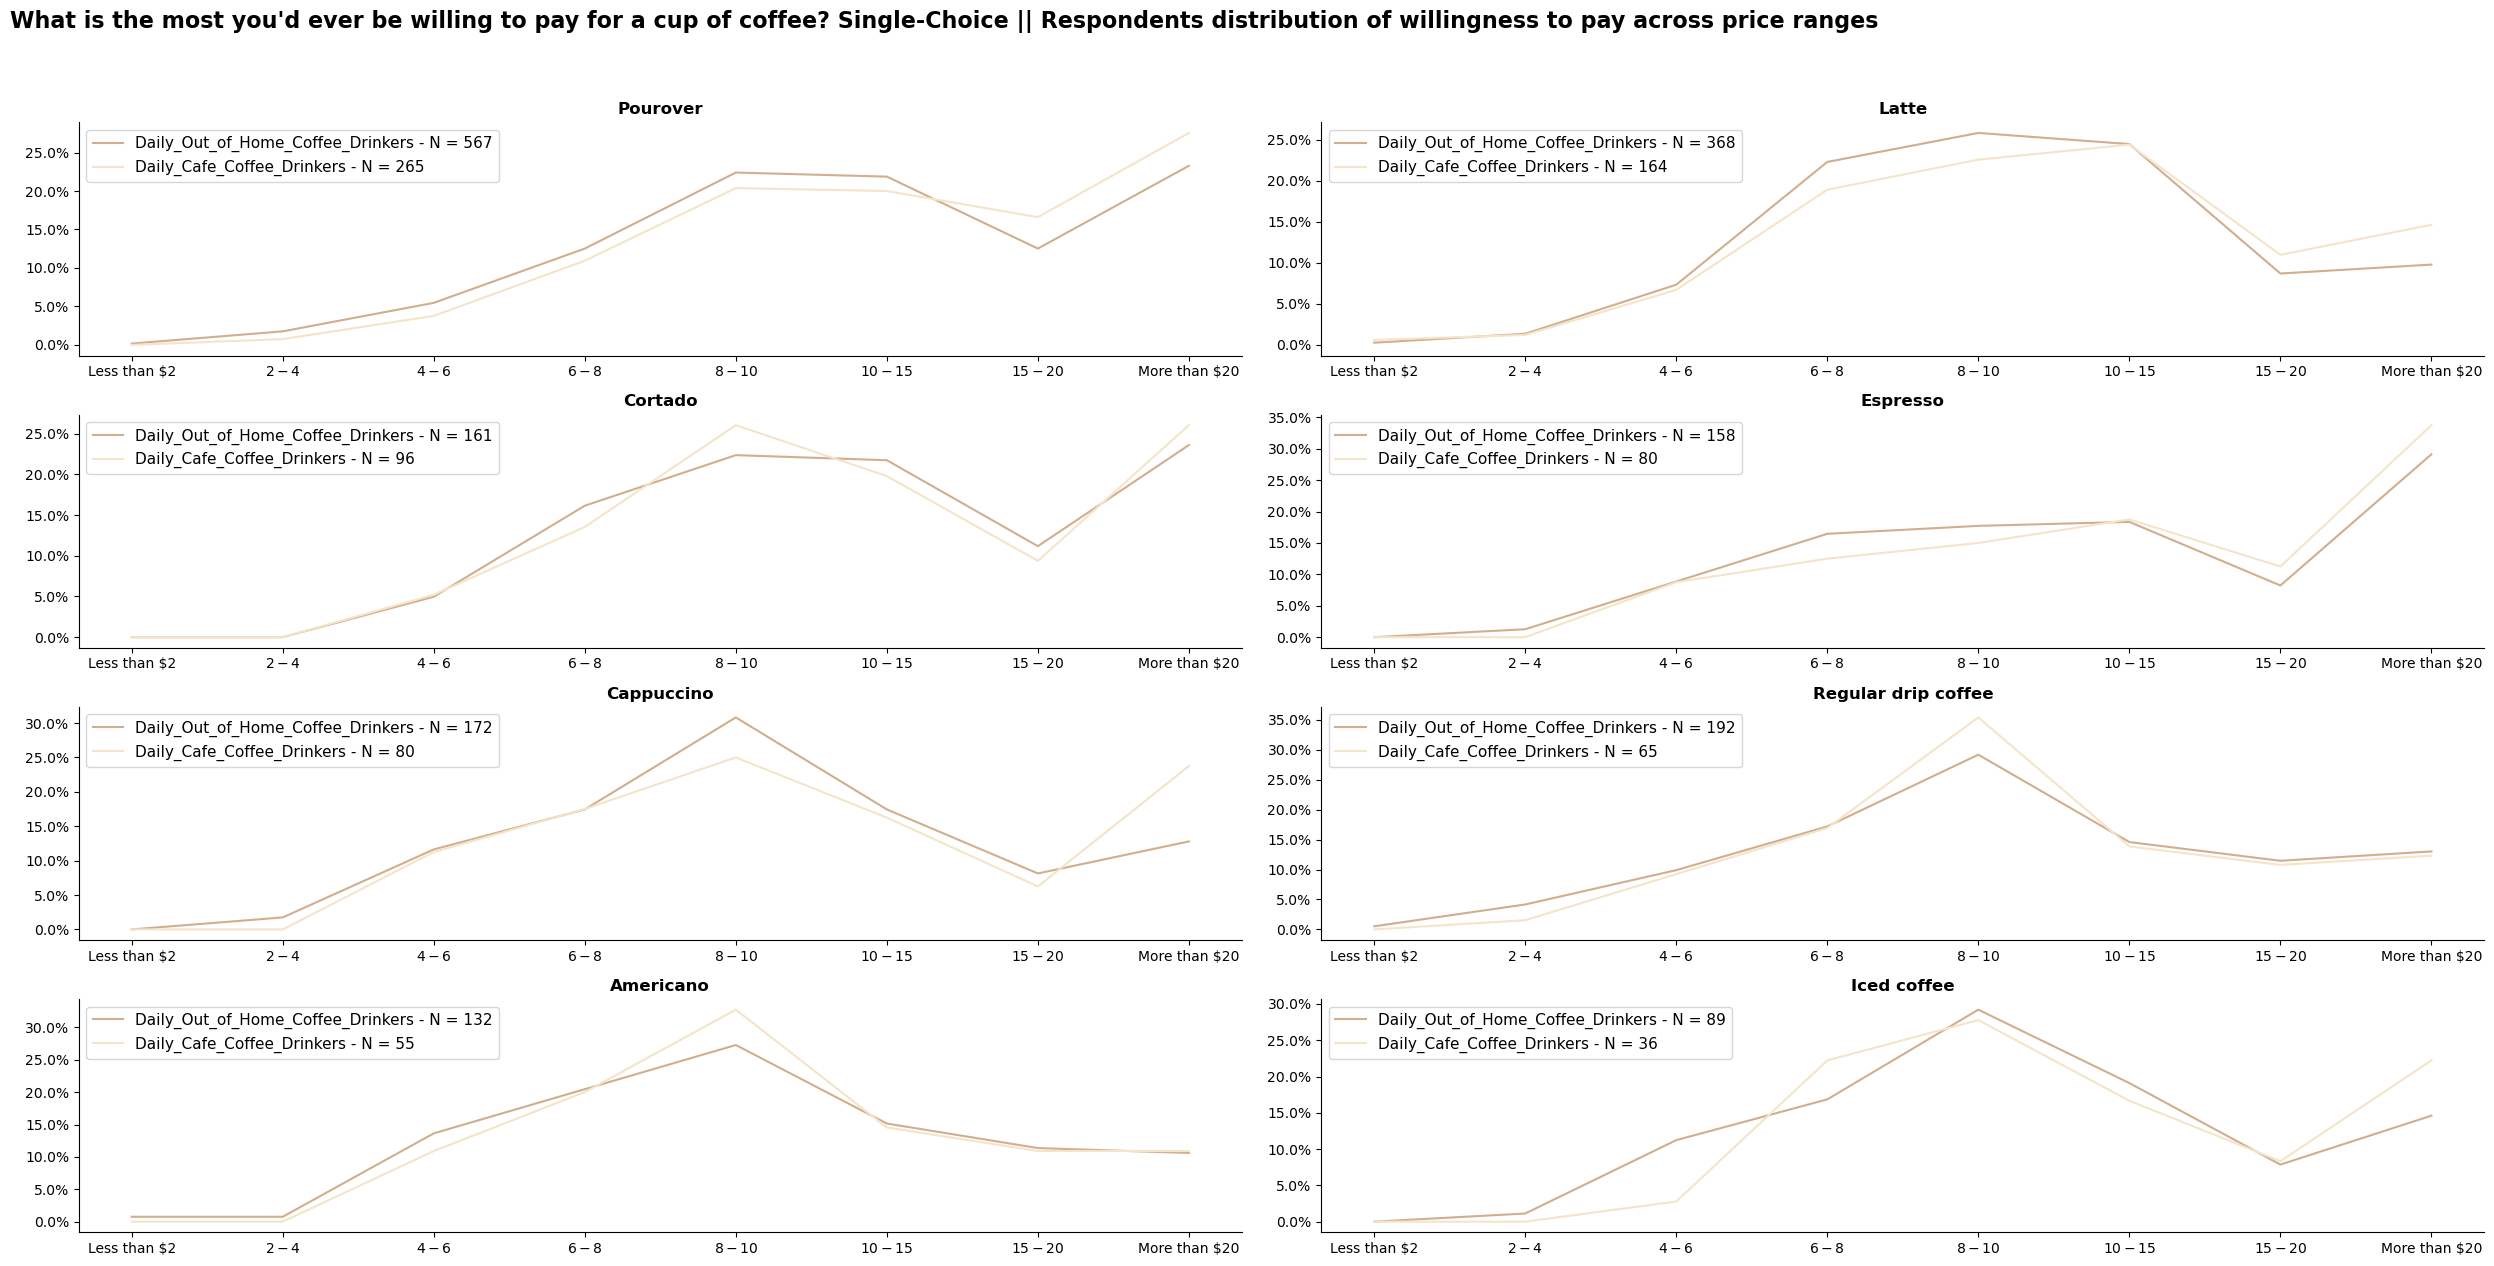

In [6]:
%%pyspark
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as mtick

# List of coffee drinks
coffee_drinks = ['Pourover', 'Latte', 'Cortado', 'Espresso', 'Cappuccino', 'Regular drip coffee', 'Americano', 'Iced coffee']

# Create a figure with 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(25, 13))

# Flatten the axes array
axs = axs.flatten()

# Define the order of the categories
order = ['Less than $2', '$2-$4', '$4-$6', '$6-$8', '$8-$10', '$10-$15', '$15-$20', 'More than $20']

# Loop over each coffee drink and create a chart
for i, coffee_drink in enumerate(coffee_drinks):
    # Filter the dataframe for the current coffee drink
    df_ooh = df_corrected12.filter(F.col('Coffee_Drink') == coffee_drink).toPandas()
    df_cafe = df_corrected12b.filter(F.col('Coffee_Drink') == coffee_drink).toPandas()
    
    # Convert the 'Answer_Choices' column to a category type with ordered categories
    df_ooh['Answer_Choices'] = pd.Categorical(df_ooh['Answer_Choices'], categories=order, ordered=True)
    df_cafe['Answer_Choices'] = pd.Categorical(df_cafe['Answer_Choices'], categories=order, ordered=True)
    
    # Create an area plot for Daily_OOH_Coffee_Drinkers
    sns.lineplot(data=df_ooh, x='Answer_Choices', y='Perc_Willing_Pay', ax=axs[i], color='#D1AE8D', label=f'Daily_Out_of_Home_Coffee_Drinkers - N = {df_ooh["question_base"].iloc[0]}')
    axs[i].fill_between(df_ooh['Answer_Choices'], df_ooh['Perc_Willing_Pay'], color='#D1AE8D', alpha=0.0)
    
    # Create an area plot for Daily_Cafe_Coffee_Drinkers
    sns.lineplot(data=df_cafe, x='Answer_Choices', y='Perc_Willing_Pay', ax=axs[i], color='#F4E4C9', label=f'Daily_Cafe_Coffee_Drinkers - N = {df_cafe["question_base"].iloc[0]}')
    axs[i].fill_between(df_cafe['Answer_Choices'], df_cafe['Perc_Willing_Pay'], color='#F4E4C9', alpha=0.0)
    
    # Set the title of the subplot
    axs[i].set_title(coffee_drink, fontweight='bold')
    
    # Remove top and right borders
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
    # Remove x-axis label
    axs[i].set_xlabel('')
    
    # Rename y-axis label
    axs[i].set_ylabel('')
    
    # Move legend to top left and make text smaller
    axs[i].legend(loc='upper left', fontsize=11)
    
    # Format y-axis as percentage
    axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add overall title
fig.suptitle("What is the most you'd ever be willing to pay for a cup of coffee? Single-Choice || Respondents distribution of willingness to pay across price ranges", fontsize=16, fontweight='bold', x=0, ha='left')

# Adjust the layout
plt.tight_layout(rect=[0, 0.01, 1, 0.95])  # Leave space for the title
plt.show()


The distribution of willingness to pay across price ranges reveals that most respondents would be willing to pay a maximum of $6 to $15 for their favorite cup of coffee. Interestingly, there’s a spike in willingness to pay more than $20, particularly for Espresso, Pourover, and Cortado, and to some extent, for Iced Coffee and Cappuccino. This tendency is generally stronger among the Daily Cafe Coffee Drinkers.

We hypothesize that some respondents might consider the $20+ price range as a combination of a coffee cup and some light food typically sold in a coffee shop. However, this hypothesis can’t be validated with the available survey questions.

Given that more than 20% of respondents across target groups seem willing to combine coffee and food, it’s recommended to further investigate this possibility. In conjunction with validating these hypotheses, stakeholders could also investigate potential food items to include in the menu.

A potential validation method could be to conduct a follow-up survey, maintaining the same demographic balance as the current survey. The survey could ask respondents if they typically consume food with their coffee. If the response is affirmative, further investigation into the type of food could be conducted (a single-choice question with various options, plus an ‘other’ option, could suffice). Additionally, the survey could inquire about the price respondents are willing to pay for a combination of coffee and food.

In [6]:
USE Maven_Coffee_Challenge_Model;

with drinks as (
SELECT
Submission_ID,
Answer_Choices as Coffee_Drink
from
Facts_Questionnaire_FullTable_NoVerbat
WHERE Question_Order = 8 and Answer = 1
),

ful_tab_drinks as (
select Facts_Questionnaire_FullTable_NoVerbat.*, drinks.Coffee_Drink
FROM
Facts_Questionnaire_FullTable_NoVerbat
left JOIN drinks
ON drinks.Submission_ID = Facts_Questionnaire_FullTable_NoVerbat.Submission_ID
),

perc_willing_pay as (
SELECT
Coffee_Drink,
Answer_Choices,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Willing_Pay,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
ful_tab_drinks
where 
Question_Order = 47 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Coffee_Drink, Answer_Choices
)

SELECT *,
1- SUM(Perc_Willing_Pay) OVER (PARTITION BY Coffee_Drink 
ORDER BY 
question_base desc,
CASE 
    WHEN Answer_Choices = 'Less than $2' THEN 1
    WHEN Answer_Choices = '$2-$4' THEN 2
    WHEN Answer_Choices = '$4-$6' THEN 3
    WHEN Answer_Choices = '$6-$8' THEN 4
    WHEN Answer_Choices = '$8-$10' THEN 5
    WHEN Answer_Choices = '$10-$15' THEN 6
    WHEN Answer_Choices = '$15-$20' THEN 7
    WHEN Answer_Choices = 'More than $20' THEN 8
    ELSE 9
END) as Total_Willing_Pay
FROM perc_willing_pay
ORDER BY 
5 DESC,
CASE 
    WHEN Answer_Choices = 'Less than $2' THEN 1
    WHEN Answer_Choices = '$2-$4' THEN 2
    WHEN Answer_Choices = '$4-$6' THEN 3
    WHEN Answer_Choices = '$6-$8' THEN 4
    WHEN Answer_Choices = '$8-$10' THEN 5
    WHEN Answer_Choices = '$10-$15' THEN 6
    WHEN Answer_Choices = '$15-$20' THEN 7
    WHEN Answer_Choices = 'More than $20' THEN 8
    ELSE 9
END;

with drinks as (
SELECT
Submission_ID,
Answer_Choices as Coffee_Drink
from
Facts_Questionnaire_FullTable_NoVerbat
WHERE Question_Order = 8 and Answer = 1
),

ful_tab_drinks as (
select Facts_Questionnaire_FullTable_NoVerbat.*, drinks.Coffee_Drink
FROM
Facts_Questionnaire_FullTable_NoVerbat
left JOIN drinks
ON drinks.Submission_ID = Facts_Questionnaire_FullTable_NoVerbat.Submission_ID
),

perc_willing_pay as (
SELECT
Coffee_Drink,
Answer_Choices,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Willing_Pay,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
ful_tab_drinks
where 
Question_Order = 47 and
Daily_Cafe_Coffee_Drinkers = 1
group by Coffee_Drink, Answer_Choices
)

SELECT *,
1 - SUM(Perc_Willing_Pay) OVER (PARTITION BY Coffee_Drink 
ORDER BY 
question_base desc,
CASE 
    WHEN Answer_Choices = 'Less than $2' THEN 1
    WHEN Answer_Choices = '$2-$4' THEN 2
    WHEN Answer_Choices = '$4-$6' THEN 3
    WHEN Answer_Choices = '$6-$8' THEN 4
    WHEN Answer_Choices = '$8-$10' THEN 5
    WHEN Answer_Choices = '$10-$15' THEN 6
    WHEN Answer_Choices = '$15-$20' THEN 7
    WHEN Answer_Choices = 'More than $20' THEN 8
    ELSE 9
END) as Total_Willing_Pay
FROM perc_willing_pay
ORDER BY 
5 DESC,
CASE 
WHEN Answer_Choices = 'Less than $2' THEN 1
    WHEN Answer_Choices = '$2-$4' THEN 2
    WHEN Answer_Choices = '$4-$6' THEN 3
    WHEN Answer_Choices = '$6-$8' THEN 4
    WHEN Answer_Choices = '$8-$10' THEN 5
    WHEN Answer_Choices = '$10-$15' THEN 6
    WHEN Answer_Choices = '$15-$20' THEN 7
    WHEN Answer_Choices = 'More than $20' THEN 8
    ELSE 9
END;



StatementMeta(, , -1, Finished, Available)

<Spark SQL result set with 0 rows and 0 fields>

<Spark SQL result set with 96 rows and 6 fields>

<Spark SQL result set with 96 rows and 6 fields>

In [7]:
%%pyspark
df_corrected13 = spark.sql("""
with drinks as (
SELECT
Submission_ID,
Answer_Choices as Coffee_Drink
from
Facts_Questionnaire_FullTable_NoVerbat
WHERE Question_Order = 8 and Answer = 1
),

ful_tab_drinks as (
select Facts_Questionnaire_FullTable_NoVerbat.*, drinks.Coffee_Drink
FROM
Facts_Questionnaire_FullTable_NoVerbat
left JOIN drinks
ON drinks.Submission_ID = Facts_Questionnaire_FullTable_NoVerbat.Submission_ID
),

perc_willing_pay as (
SELECT
Coffee_Drink,
Answer_Choices,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Willing_Pay,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
ful_tab_drinks
where 
Question_Order = 47 and
Daily_Out_of_Home_Coffee_Drinkers = 1
group by Coffee_Drink, Answer_Choices
)

SELECT *,
1- SUM(Perc_Willing_Pay) OVER (PARTITION BY Coffee_Drink 
ORDER BY 
question_base desc,
CASE 
    WHEN Answer_Choices = 'Less than $2' THEN 1
    WHEN Answer_Choices = '$2-$4' THEN 2
    WHEN Answer_Choices = '$4-$6' THEN 3
    WHEN Answer_Choices = '$6-$8' THEN 4
    WHEN Answer_Choices = '$8-$10' THEN 5
    WHEN Answer_Choices = '$10-$15' THEN 6
    WHEN Answer_Choices = '$15-$20' THEN 7
    WHEN Answer_Choices = 'More than $20' THEN 8
    ELSE 9
END) as Total_Willing_Pay
FROM perc_willing_pay
ORDER BY 
5 DESC,
CASE 
    WHEN Answer_Choices = 'Less than $2' THEN 1
    WHEN Answer_Choices = '$2-$4' THEN 2
    WHEN Answer_Choices = '$4-$6' THEN 3
    WHEN Answer_Choices = '$6-$8' THEN 4
    WHEN Answer_Choices = '$8-$10' THEN 5
    WHEN Answer_Choices = '$10-$15' THEN 6
    WHEN Answer_Choices = '$15-$20' THEN 7
    WHEN Answer_Choices = 'More than $20' THEN 8
    ELSE 9
END
""")

df_corrected13b = spark.sql("""
with drinks as (
SELECT
Submission_ID,
Answer_Choices as Coffee_Drink
from
Facts_Questionnaire_FullTable_NoVerbat
WHERE Question_Order = 8 and Answer = 1
),

ful_tab_drinks as (
select Facts_Questionnaire_FullTable_NoVerbat.*, drinks.Coffee_Drink
FROM
Facts_Questionnaire_FullTable_NoVerbat
left JOIN drinks
ON drinks.Submission_ID = Facts_Questionnaire_FullTable_NoVerbat.Submission_ID
),

perc_willing_pay as (
SELECT
Coffee_Drink,
Answer_Choices,
sum(Answer)  / 
count(DISTINCT Submission_ID) as Perc_Willing_Pay,
sum(Answer) as answer_base ,
count(DISTINCT Submission_ID) as question_base
from
ful_tab_drinks
where 
Question_Order = 47 and
Daily_Cafe_Coffee_Drinkers = 1
group by Coffee_Drink, Answer_Choices
)

SELECT *,
1- SUM(Perc_Willing_Pay) OVER (PARTITION BY Coffee_Drink 
ORDER BY 
question_base desc,
CASE 
    WHEN Answer_Choices = 'Less than $2' THEN 1
    WHEN Answer_Choices = '$2-$4' THEN 2
    WHEN Answer_Choices = '$4-$6' THEN 3
    WHEN Answer_Choices = '$6-$8' THEN 4
    WHEN Answer_Choices = '$8-$10' THEN 5
    WHEN Answer_Choices = '$10-$15' THEN 6
    WHEN Answer_Choices = '$15-$20' THEN 7
    WHEN Answer_Choices = 'More than $20' THEN 8
    ELSE 9
END) as Total_Willing_Pay
FROM perc_willing_pay
ORDER BY 
5 DESC,
CASE 
    WHEN Answer_Choices = 'Less than $2' THEN 1
    WHEN Answer_Choices = '$2-$4' THEN 2
    WHEN Answer_Choices = '$4-$6' THEN 3
    WHEN Answer_Choices = '$6-$8' THEN 4
    WHEN Answer_Choices = '$8-$10' THEN 5
    WHEN Answer_Choices = '$10-$15' THEN 6
    WHEN Answer_Choices = '$15-$20' THEN 7
    WHEN Answer_Choices = 'More than $20' THEN 8
    ELSE 9
END
""")

StatementMeta(, 7ebc917a-8bb0-41bd-a5d1-2f6d69ee601e, 15, Finished, Available)

In [8]:
%%pyspark
pip install matplotlib seaborn


StatementMeta(, 7ebc917a-8bb0-41bd-a5d1-2f6d69ee601e, 16, Finished, Available)

Note: you may need to restart the kernel to use updated packages.


StatementMeta(, 7ebc917a-8bb0-41bd-a5d1-2f6d69ee601e, 27, Finished, Available)

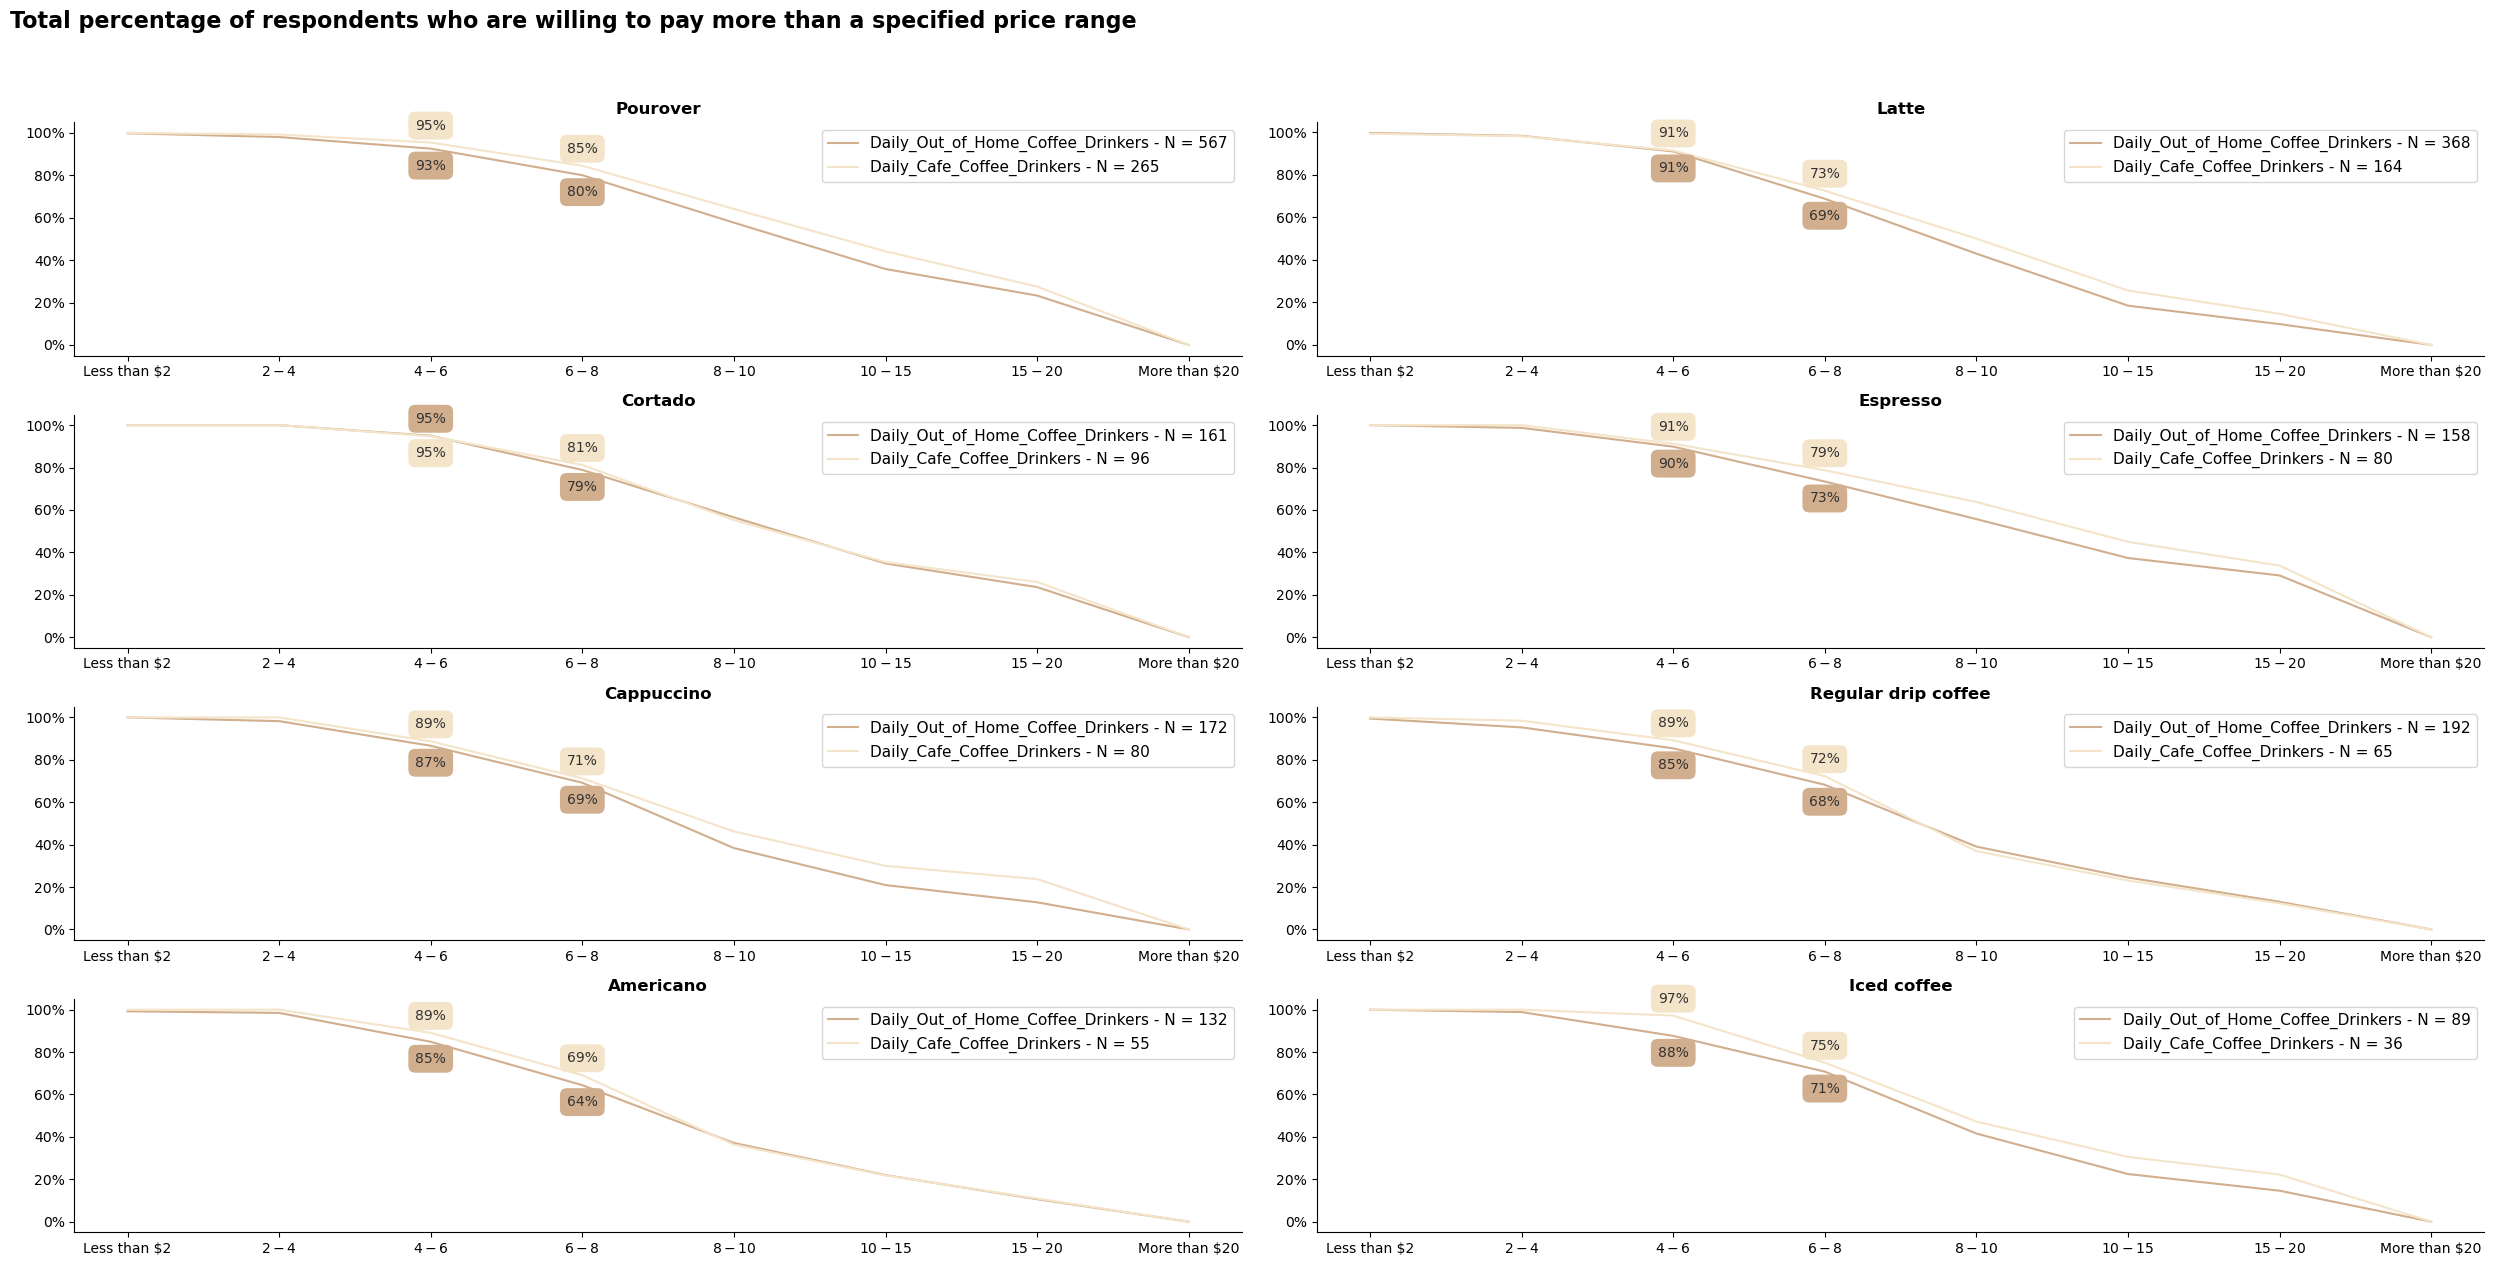

In [19]:
%%pyspark
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as mtick

# List of coffee drinks
coffee_drinks = ['Pourover', 'Latte', 'Cortado', 'Espresso', 'Cappuccino', 'Regular drip coffee', 'Americano', 'Iced coffee']

# Create a figure with 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(25, 13))

# Flatten the axes array
axs = axs.flatten()

# Define the order of the categories
order = ['Less than $2', '$2-$4', '$4-$6', '$6-$8', '$8-$10', '$10-$15', '$15-$20', 'More than $20']

# Loop over each coffee drink and create a chart
for i, coffee_drink in enumerate(coffee_drinks):
    # Filter the dataframe for the current coffee drink
    df_ooh = df_corrected13.filter(F.col('Coffee_Drink') == coffee_drink).toPandas()
    df_cafe = df_corrected13b.filter(F.col('Coffee_Drink') == coffee_drink).toPandas()
    
    # Convert the 'Answer_Choices' column to a category type with ordered categories
    df_ooh['Answer_Choices'] = pd.Categorical(df_ooh['Answer_Choices'], categories=order, ordered=True)
    df_cafe['Answer_Choices'] = pd.Categorical(df_cafe['Answer_Choices'], categories=order, ordered=True)
    
    # Create an area plot for Daily_OOH_Coffee_Drinkers
    sns.lineplot(data=df_ooh, x='Answer_Choices', y='Total_Willing_Pay', ax=axs[i], color='#D1AE8D', label=f'Daily_Out_of_Home_Coffee_Drinkers - N = {df_ooh["question_base"].iloc[0]}')
    axs[i].fill_between(df_ooh['Answer_Choices'], df_ooh['Total_Willing_Pay'], color='#D1AE8D', alpha=0.0)
    
    # Create an area plot for Daily_Cafe_Coffee_Drinkers
    sns.lineplot(data=df_cafe, x='Answer_Choices', y='Total_Willing_Pay', ax=axs[i], color='#F4E4C9', label=f'Daily_Cafe_Coffee_Drinkers - N = {df_cafe["question_base"].iloc[0]}')
    axs[i].fill_between(df_cafe['Answer_Choices'], df_cafe['Total_Willing_Pay'], color='#F4E4C9', alpha=0.0)
    
    # Add data labels for 'Daily_Out_of_Home_Coffee_Drinkers' and 'Daily_Cafe_Coffee_Drinkers' for the categories '4-6' and '6-8'
    for category in ['$4-$6', '$6-$8']:
        # Get y values for 'Daily_Out_of_Home_Coffee_Drinkers' and 'Daily_Cafe_Coffee_Drinkers'
        y_ooh = df_ooh.loc[df_ooh['Answer_Choices'] == category, 'Total_Willing_Pay'].values[0]
        y_cafe = df_cafe.loc[df_cafe['Answer_Choices'] == category, 'Total_Willing_Pay'].values[0]

        # Determine the position of the labels based on their values
        if y_ooh > y_cafe:
            positions = [y_ooh + 0.08, y_cafe - 0.08]  # Adjust the y values to ensure a minimum distance of 2pt
        else:
            positions = [y_ooh - 0.08, y_cafe + 0.08]  # Adjust the y values to ensure a minimum distance of 2pt

        # Add data label for 'Daily_Out_of_Home_Coffee_Drinkers'
        axs[i].text(category, positions[0], f'{y_ooh*100:.0f}%', color='#333333', ha='center', va='center', bbox=dict(facecolor='#D1AE8D', edgecolor='none', boxstyle='round,pad=0.5'))

        # Add data label for 'Daily_Cafe_Coffee_Drinkers'
        axs[i].text(category, positions[1], f'{y_cafe*100:.0f}%', color='#333333', ha='center', va='center', bbox=dict(facecolor='#F4E4C9', edgecolor='none', boxstyle='round,pad=0.5'))
    
    # Set the title of the subplot
    axs[i].set_title(coffee_drink, fontweight='bold')
    
    # Remove top and right borders
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
    # Remove x-axis label
    axs[i].set_xlabel('')
    
    # Rename y-axis label
    axs[i].set_ylabel('')
    
    # Move legend to top left and make text smaller
    axs[i].legend(loc='upper right', fontsize=11)
    
    # Format y-axis as percentage
    axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add overall title
fig.suptitle("Total percentage of respondents who are willing to pay more than a specified price range", fontsize=16, fontweight='bold', x=0, ha='left')

# Adjust the layout
plt.tight_layout(rect=[0, 0.01, 1, 0.95])  # Leave space for the title
plt.show()

please upload to lakehouse

In investigating the optimal price for each coffee drink, we conducted an additional analysis. We identified the percentage of respondents willing to pay more than each price range.

The analysis shows that when considering a price range of $4-$6 for a cup of coffee, 89% to 97% of respondents across favorite drinks would be willing to pay more. However, when we move to the next price range of $6-$8, the willingness to pay drops significantly to from 69% to 85%, depending on the favorite drink.

The drop is even sharper beyond $8 per drink. Therefore, it is advisable to keep the price range from $4 to $8 per coffee drink. Looking at the individual coffee drinks preferences and their decreasing curves of willingness to pay, we can summarize the prices as follows:

- Pourover: $6-$8 per cup
- Latte: $4-$6 per cup
- Cortado: $6-$8 per cup
- Espresso: $6-$8 per cup
- Cappuccino: $4-$6 per cup
- Regular drip coffee: $4-$6 per cup
- Americano: $4-$6 per cup
- Iced coffee: $4-$6 per cup

### Final Recommendations

**Main target audiences**

- Daily Cafe Coffee Drinkers: individuals who typically drink at least one coffee per day and, and that claim to drink coffees at a cafe, among the places where they typically drink coffees. 
- Daily Out-of-Home Coffee Drinkers: individuals who typically drink at least one coffee per day, and that claim to drink coffees at a cafe or at the office or on the go, among the places where they typically drink coffees. 

The two audiences have similar preferences, although with some differences and, in order to satisfy their needs consider to set up the initial menu prioritizing:

**Menu**

**Coffee Drinks and Price**

- Pourover: $6-$8 per cup
- Latte: $4-$6 per cup
- Cortado: $6-$8 per cup
- Espresso: $6-$8 per cup
- Cappuccino: $4-$6 per cup
- Regular drip coffee: $4-$6 per cup
- Americano: $4-$6 per cup
- Iced coffee: $4-$6 per cup

**Coffee Additives - Diary**

- Whole milk
- Half and half
- Oat milk

**Coffee Additives - Sugar**

- Granulated sugar
- Brown sugar
- Raw Sugar Turbinado
- Artificial sweeteners
- Honey

**Coffee Beans Types**

- Fruity (if possible with blueberries retro-taste and fermented/sour)
- Chocolatey
- Full Bodied
- Bright

**Coffee Strength & Roasting Level**

- Medium-strong coffee
- Light-medium roasting

**Next steps**

Consider further market research investigations on the possible incidence, among the targeted audiences, of potential customers that would purchase food together with their cup of coffee. Also consider investigating what foods should be introduced in the menu and for how much. 